In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_trans= pd.read_csv("trans/transcript_data/1.csv")

In [4]:
df_trans.head(2)

id  seek  start   end                                               text  \
0   0     0   0.00  5.56   Hello, I am Jeffrey Shepherd and I am current...   
1   1     0   5.56  9.60   IIM Coikode. I have completed my B.Tech in Bi...   

                                              tokens  temperature  \
0  [50364, 2425, 11, 286, 669, 1587, 84, 2938, 49...          0.0   
1  [50642, 286, 6324, 3066, 1035, 1429, 13, 286, ...          0.0   

   avg_logprob  compression_ratio  no_speech_prob  positive  negative  \
0    -0.447179           1.651235         0.63588  0.580265  0.152281   
1    -0.447179           1.651235         0.63588  0.550327  0.189263   

    neutral  confident  hesitant   concise  enthusiastic  speech_speed  
0  0.267454   0.846701  0.845698  0.635805      0.647783      2.517986  
1  0.260410   0.679283  0.733701  0.544145      0.417390      3.217822

In [5]:
df_trans.columns

Index(['id', 'seek', 'start', 'end', 'text', 'tokens', 'temperature',
       'avg_logprob', 'compression_ratio', 'no_speech_prob', 'positive',
       'negative', 'neutral', 'confident', 'hesitant', 'concise',
       'enthusiastic', 'speech_speed'],
      dtype='object')

In [6]:
df_emotion = pd.read_csv("emotion_data-20240913T095942Z-001/emotion_data/1/emotion.csv")
df_emotion.head()

movie_id  image_seq     angry   disgust  \
0  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          0   4.31735  0.000594   
1  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          1  53.22530  2.981640   
2  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          2   8.79651  0.029468   
3  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          3   9.45303  0.106778   
4  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          4  56.00020  0.000004   

        fear     happy        sad   surprise   neutral dominant_emotion  
0   2.879790   1.65035   2.779980   0.600814  87.77110          neutral  
1  12.736800   1.52347   1.051320  27.216800   1.26462            angry  
2   2.968160  16.83150  39.884600   0.279335  31.21050              sad  
3   1.553080  20.93010   3.503870   0.909426  63.54370          neutral  
4   0.162231   5.58358   0.197026  12.807600  25.24940            angry

In [7]:
df_emotion.columns

Index(['movie_id', 'image_seq', 'angry', 'disgust', 'fear', 'happy', 'sad',
       'surprise', 'neutral', 'dominant_emotion'],
      dtype='object')

In [8]:
df_gaze= pd.read_csv("emotion_data-20240913T095942Z-001/emotion_data/1/gaze.csv")

In [9]:
df_gaze.head()

movie_id  image_seq  gaze  blink  eye_offset
0  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          1     1      0      6.2253
1  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          2     1      0     22.7274
2  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          3     1      0      2.5704
3  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          4     1      0     21.1097
4  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          5     1      0      1.8453

In [10]:
df_gaze.columns

Index(['movie_id', 'image_seq', 'gaze', 'blink', 'eye_offset'], dtype='object')

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

def emotion_eda(df):
    # Basic Information
    print("Data Summary:")
    print(df.info())
    print("\nStatistical Summary:")
    print(df.describe())
    
    # Check for Missing Values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Check for Duplicates
    print("\nDuplicates:")
    print(df.duplicated().sum())
    
    # Distribution of Emotion Scores
    emotion_columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    df[emotion_columns].hist(bins=20, figsize=(14, 10))
    plt.suptitle('Distribution of Emotion Scores')
    plt.show()
    
    # Dominant Emotion Analysis
    dominant_emotion_counts = df['dominant_emotion'].value_counts()
    print("\nDominant Emotion Counts:")
    print(dominant_emotion_counts)
    dominant_emotion_counts.plot(kind='bar', title='Dominant Emotion Counts')
    plt.show()
    
    # Correlation Analysis
    correlation_matrix = df[emotion_columns].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Emotion Scores')
    plt.show()
    
    # Temporal or Sequential Analysis
    plt.figure(figsize=(14, 8))
    for emotion in emotion_columns:
        plt.plot(df['image_seq'], df[emotion], label=emotion)
    plt.xlabel('Image Sequence')
    plt.ylabel('Emotion Score')
    plt.title('Emotion Scores Over Image Sequence')
    plt.legend()
    plt.show()
    
    # Group Analysis by Dominant Emotion
    grouped = df.groupby('dominant_emotion').mean()
    print("\nAverage Emotion Scores by Dominant Emotion:")
    print(grouped)
    grouped[emotion_columns].plot(kind='bar', figsize=(14, 8))
    plt.title('Average Emotion Scores by Dominant Emotion')
    plt.show()


Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          87 non-null     object 
 1   image_seq         87 non-null     int64  
 2   angry             87 non-null     float64
 3   disgust           87 non-null     float64
 4   fear              87 non-null     float64
 5   happy             87 non-null     float64
 6   sad               87 non-null     float64
 7   surprise          87 non-null     float64
 8   neutral           87 non-null     float64
 9   dominant_emotion  87 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 6.9+ KB
None

Statistical Summary:
       image_seq      angry       disgust       fear      happy        sad  \
count  87.000000  87.000000  8.700000e+01  87.000000  87.000000  87.000000   
mean   45.390805  14.451059  6.168965e-01  18.382797   5.865318  13.575324

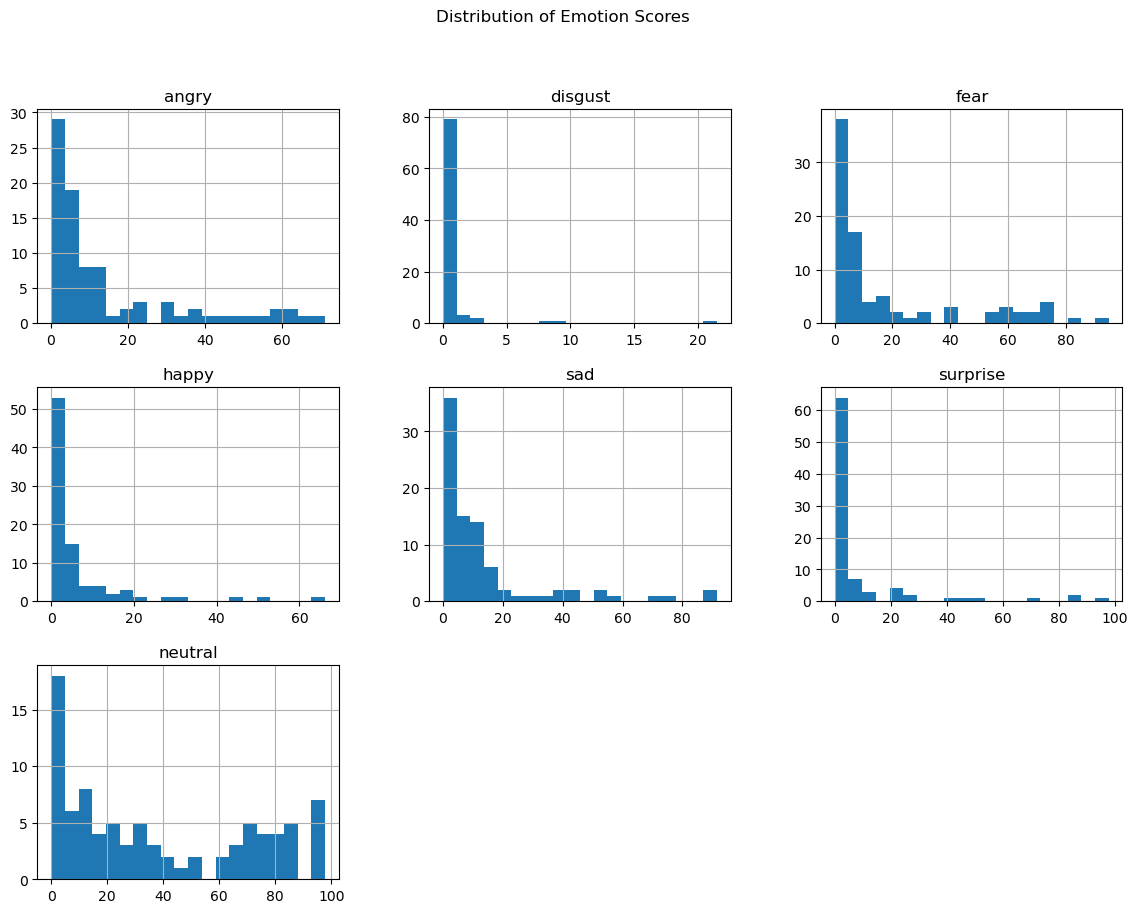


Dominant Emotion Counts:
dominant_emotion
neutral     37
fear        19
angry       11
sad         10
surprise     7
happy        3
Name: count, dtype: int64


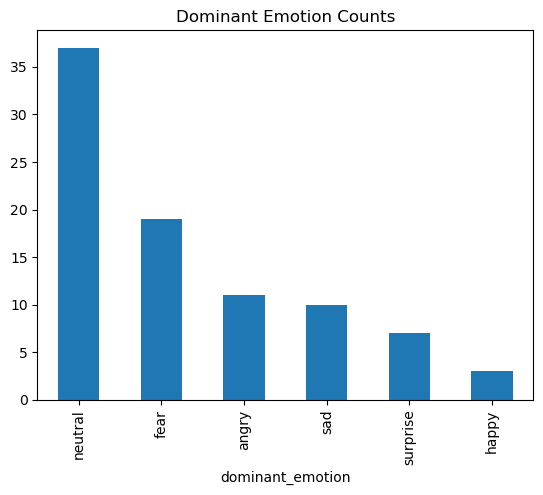


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000 -0.030151 -0.226684 -0.042435 -0.122666  0.049052 -0.323825
disgust  -0.030151  1.000000  0.135674  0.093685  0.004282 -0.020750 -0.186817
fear     -0.226684  0.135674  1.000000 -0.052387 -0.154630 -0.054493 -0.493469
happy    -0.042435  0.093685 -0.052387  1.000000 -0.058035 -0.049472 -0.217198
sad      -0.122666  0.004282 -0.154630 -0.058035  1.000000 -0.276290 -0.226286
surprise  0.049052 -0.020750 -0.054493 -0.049472 -0.276290  1.000000 -0.390989
neutral  -0.323825 -0.186817 -0.493469 -0.217198 -0.226286 -0.390989  1.000000


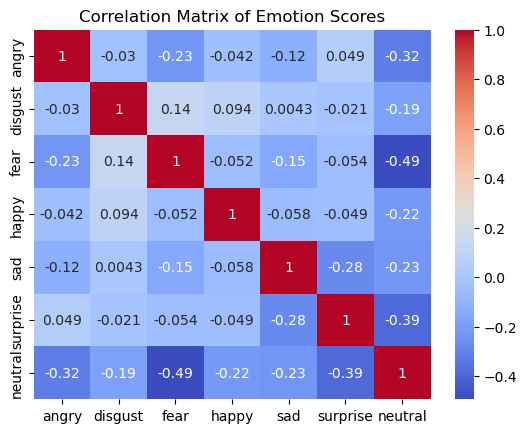

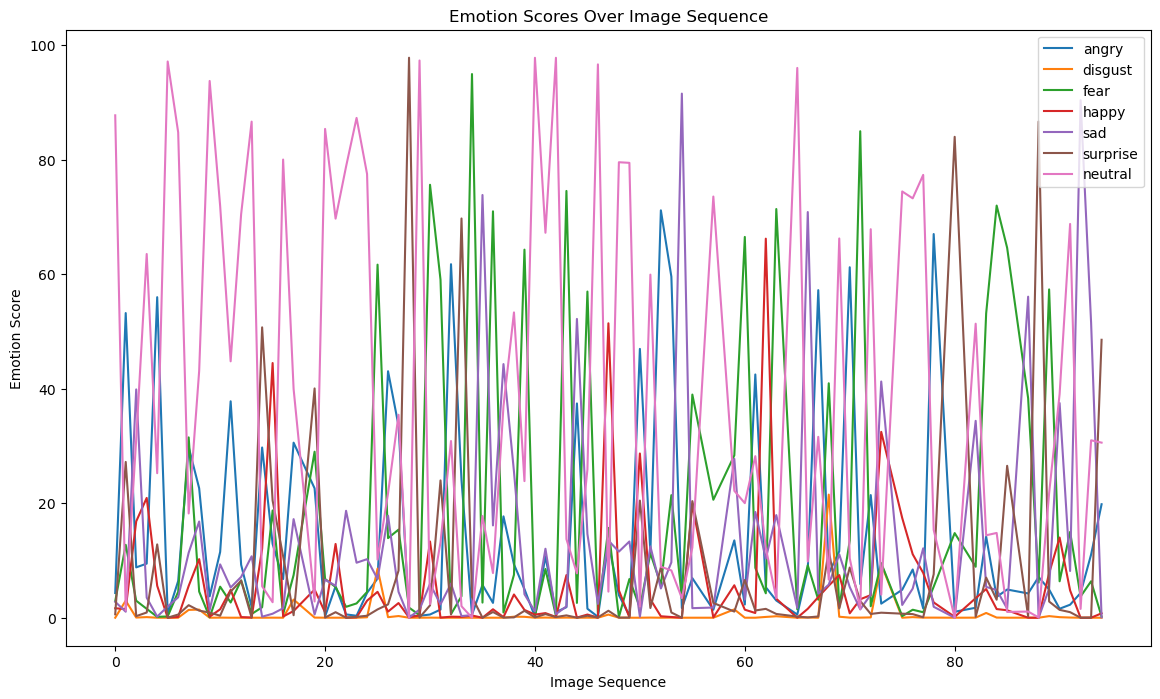

Error reading emotion_data-20240913T095942Z-001/emotion_data/1\emotion.csv: Could not convert 93663f94-bf0a-4ce8-a29a-a5236cc7fe6a93663f94-bf0a-4ce8-a29a-a5236cc7fe6a93663f94-bf0a-4ce8-a29a-a5236cc7fe6a93663f94-bf0a-4ce8-a29a-a5236cc7fe6a93663f94-bf0a-4ce8-a29a-a5236cc7fe6a93663f94-bf0a-4ce8-a29a-a5236cc7fe6a93663f94-bf0a-4ce8-a29a-a5236cc7fe6a93663f94-bf0a-4ce8-a29a-a5236cc7fe6a93663f94-bf0a-4ce8-a29a-a5236cc7fe6a93663f94-bf0a-4ce8-a29a-a5236cc7fe6a93663f94-bf0a-4ce8-a29a-a5236cc7fe6a to numeric
Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          87 non-null     object 
 1   image_seq         87 non-null     int64  
 2   angry             87 non-null     float64
 3   disgust           87 non-null     float64
 4   fear              87 non-null     float64
 5   happy             87 non-null     float64
 6   

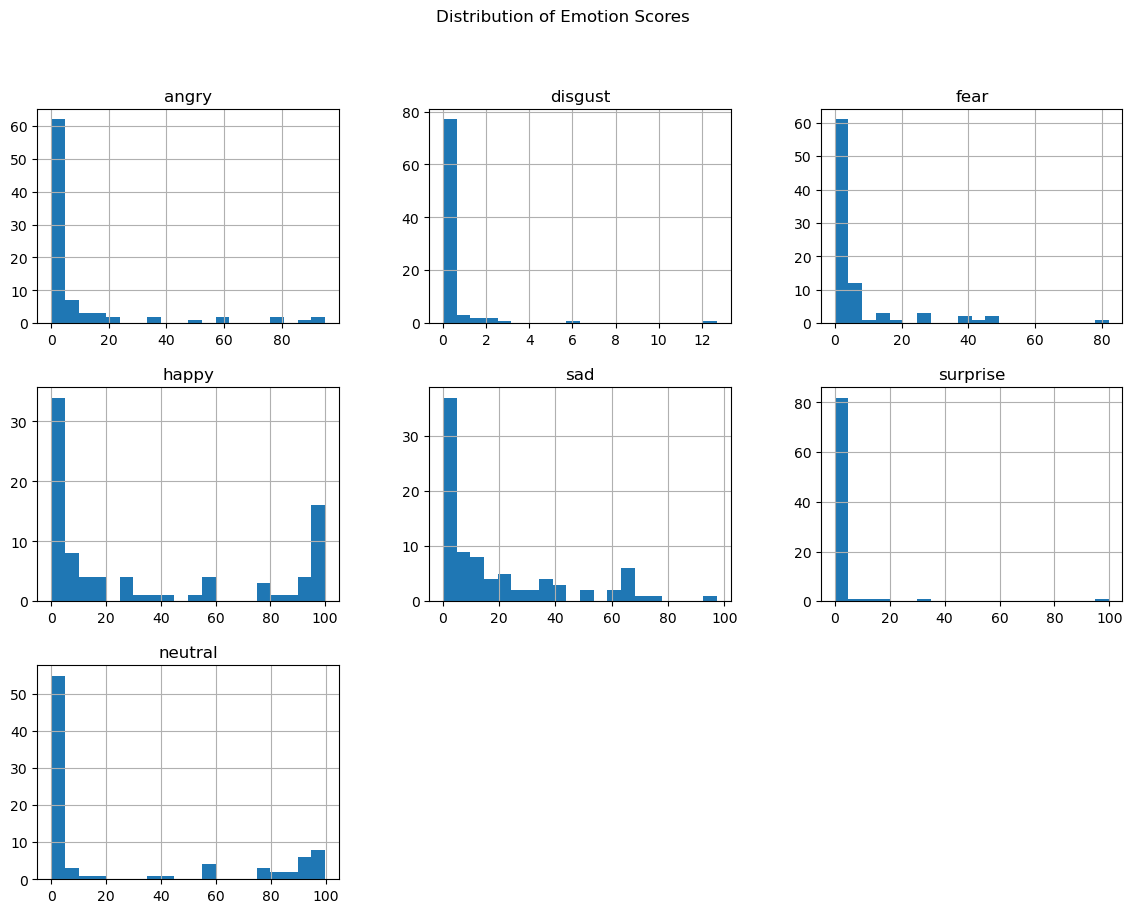


Dominant Emotion Counts:
dominant_emotion
happy       31
neutral     26
sad         15
angry        9
fear         4
surprise     2
Name: count, dtype: int64


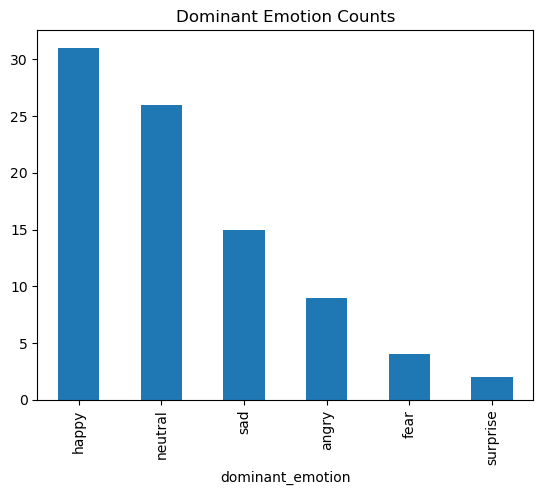


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000  0.376494 -0.021689 -0.310473  0.001146 -0.013183 -0.261804
disgust   0.376494  1.000000  0.162731 -0.149071 -0.000532  0.027271 -0.168797
fear     -0.021689  0.162731  1.000000 -0.191841  0.108723  0.039167 -0.225216
happy    -0.310473 -0.149071 -0.191841  1.000000 -0.319102 -0.141855 -0.545929
sad       0.001146 -0.000532  0.108723 -0.319102  1.000000 -0.087774 -0.283059
surprise -0.013183  0.027271  0.039167 -0.141855 -0.087774  1.000000 -0.101539
neutral  -0.261804 -0.168797 -0.225216 -0.545929 -0.283059 -0.101539  1.000000


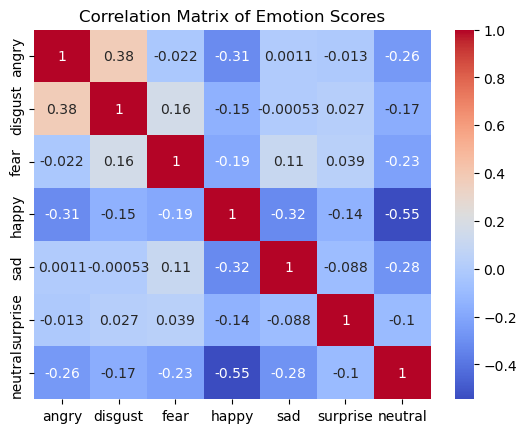

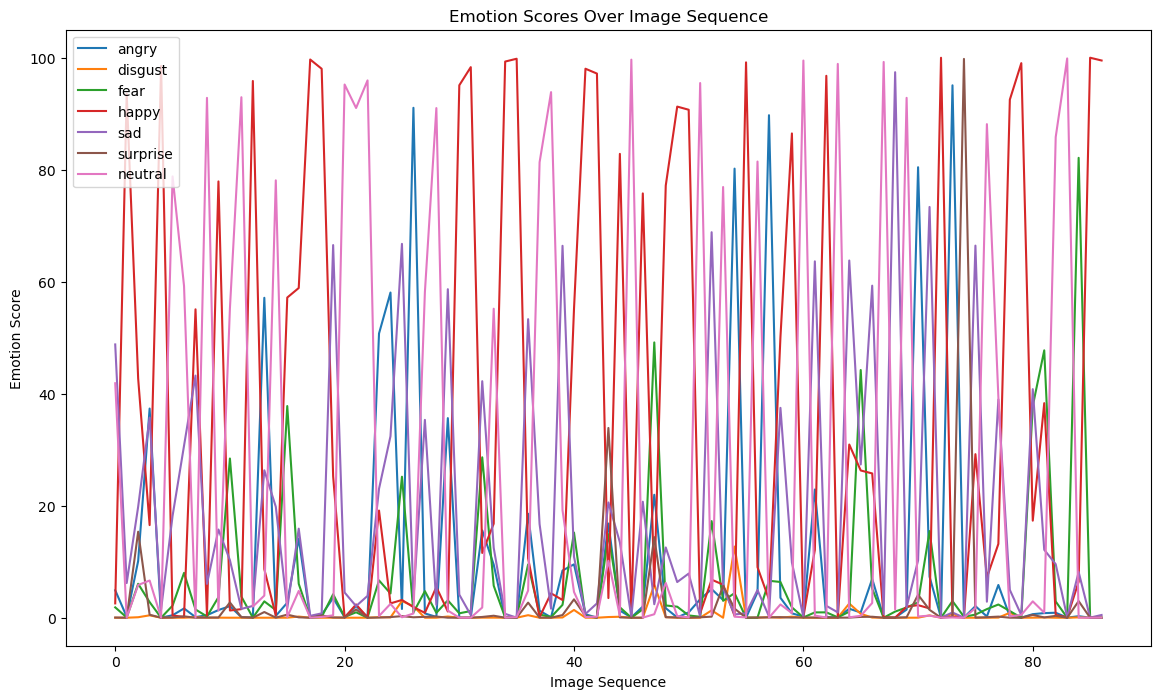

Error reading emotion_data-20240913T095942Z-001/emotion_data/2\emotion.csv: Could not convert baa26895-85b2-465b-a972-649b41d9870ebaa26895-85b2-465b-a972-649b41d9870ebaa26895-85b2-465b-a972-649b41d9870ebaa26895-85b2-465b-a972-649b41d9870ebaa26895-85b2-465b-a972-649b41d9870ebaa26895-85b2-465b-a972-649b41d9870ebaa26895-85b2-465b-a972-649b41d9870ebaa26895-85b2-465b-a972-649b41d9870ebaa26895-85b2-465b-a972-649b41d9870e to numeric
Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          100 non-null    object 
 1   image_seq         100 non-null    int64  
 2   angry             100 non-null    float64
 3   disgust           100 non-null    float64
 4   fear              100 non-null    float64
 5   happy             100 non-null    float64
 6   sad               100 non-null    float64
 7   surprise          100 no

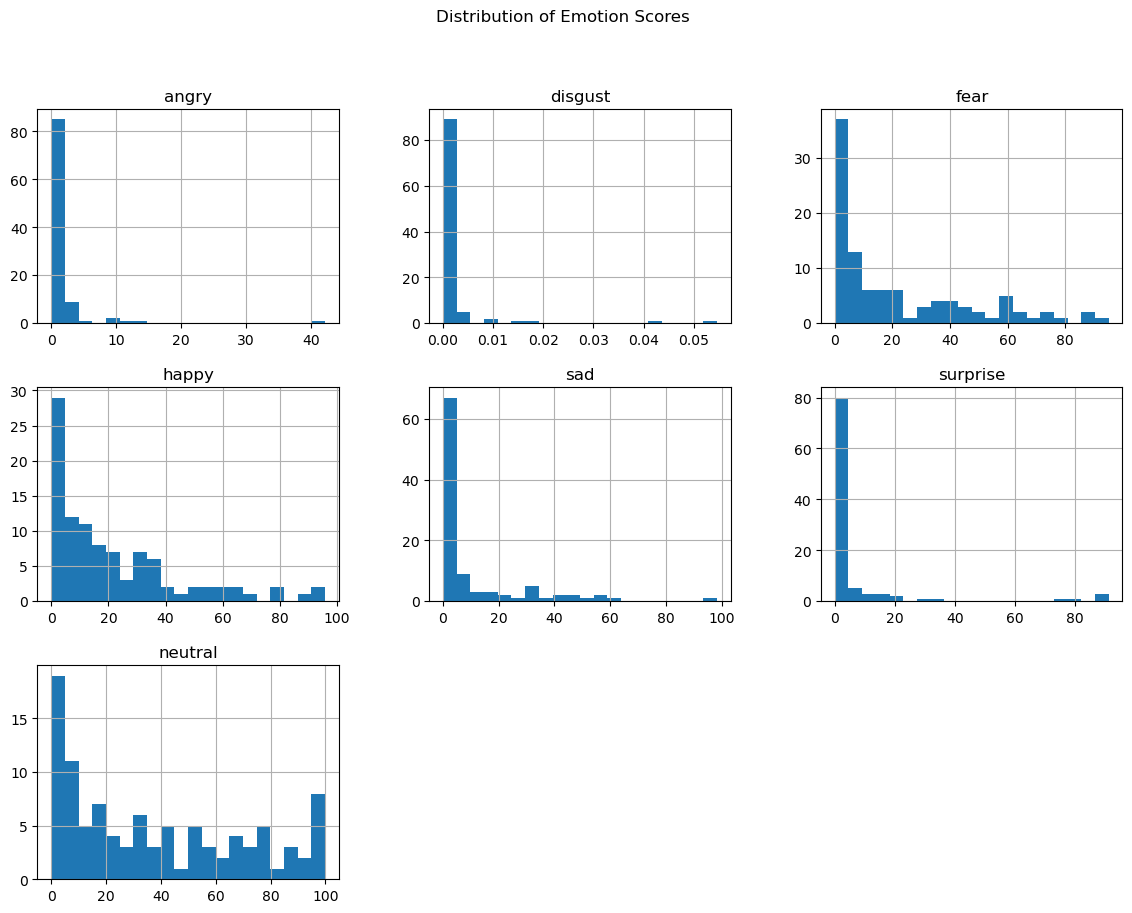


Dominant Emotion Counts:
dominant_emotion
neutral     43
fear        26
happy       16
sad          9
surprise     5
angry        1
Name: count, dtype: int64


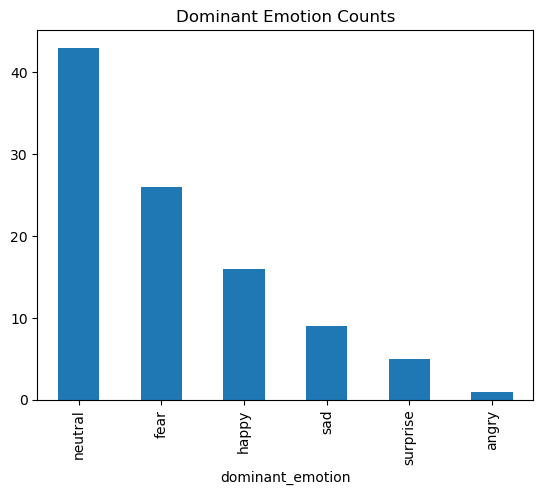


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000  0.357227  0.054289 -0.032160  0.049114 -0.058751 -0.153371
disgust   0.357227  1.000000  0.185311 -0.037354  0.039690  0.038628 -0.208886
fear      0.054289  0.185311  1.000000 -0.219632  0.075124 -0.073951 -0.607598
happy    -0.032160 -0.037354 -0.219632  1.000000 -0.249603 -0.243451 -0.267191
sad       0.049114  0.039690  0.075124 -0.249603  1.000000 -0.157564 -0.331038
surprise -0.058751  0.038628 -0.073951 -0.243451 -0.157564  1.000000 -0.256653
neutral  -0.153371 -0.208886 -0.607598 -0.267191 -0.331038 -0.256653  1.000000


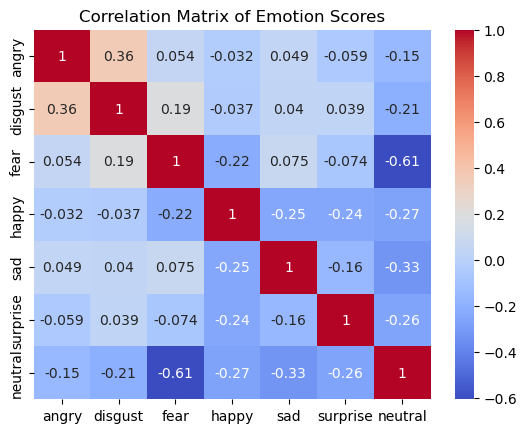

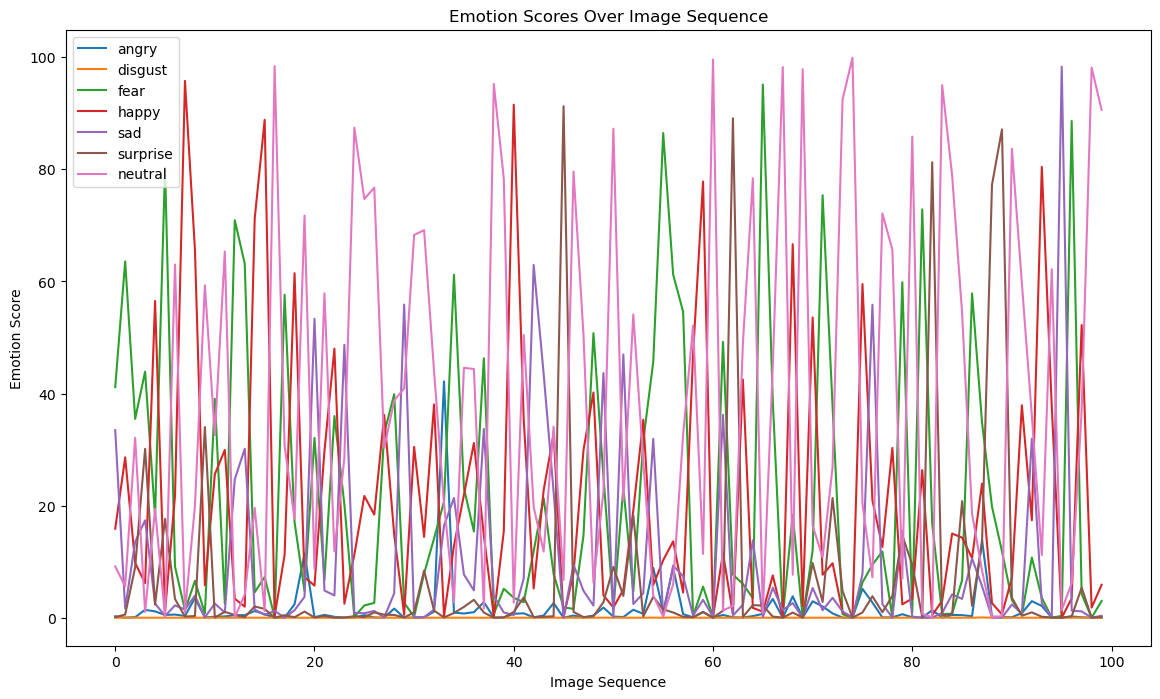

Error reading emotion_data-20240913T095942Z-001/emotion_data/3\emotion.csv: Could not convert d0b9170b-98b9-48e1-a1b2-1d661bb0d853 to numeric
Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          99 non-null     object 
 1   image_seq         99 non-null     int64  
 2   angry             99 non-null     float64
 3   disgust           99 non-null     float64
 4   fear              99 non-null     float64
 5   happy             99 non-null     float64
 6   sad               99 non-null     float64
 7   surprise          99 non-null     float64
 8   neutral           99 non-null     float64
 9   dominant_emotion  99 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 7.9+ KB
None

Statistical Summary:
       image_seq      angry       disgust       fear      happy        sad  \
count  99.

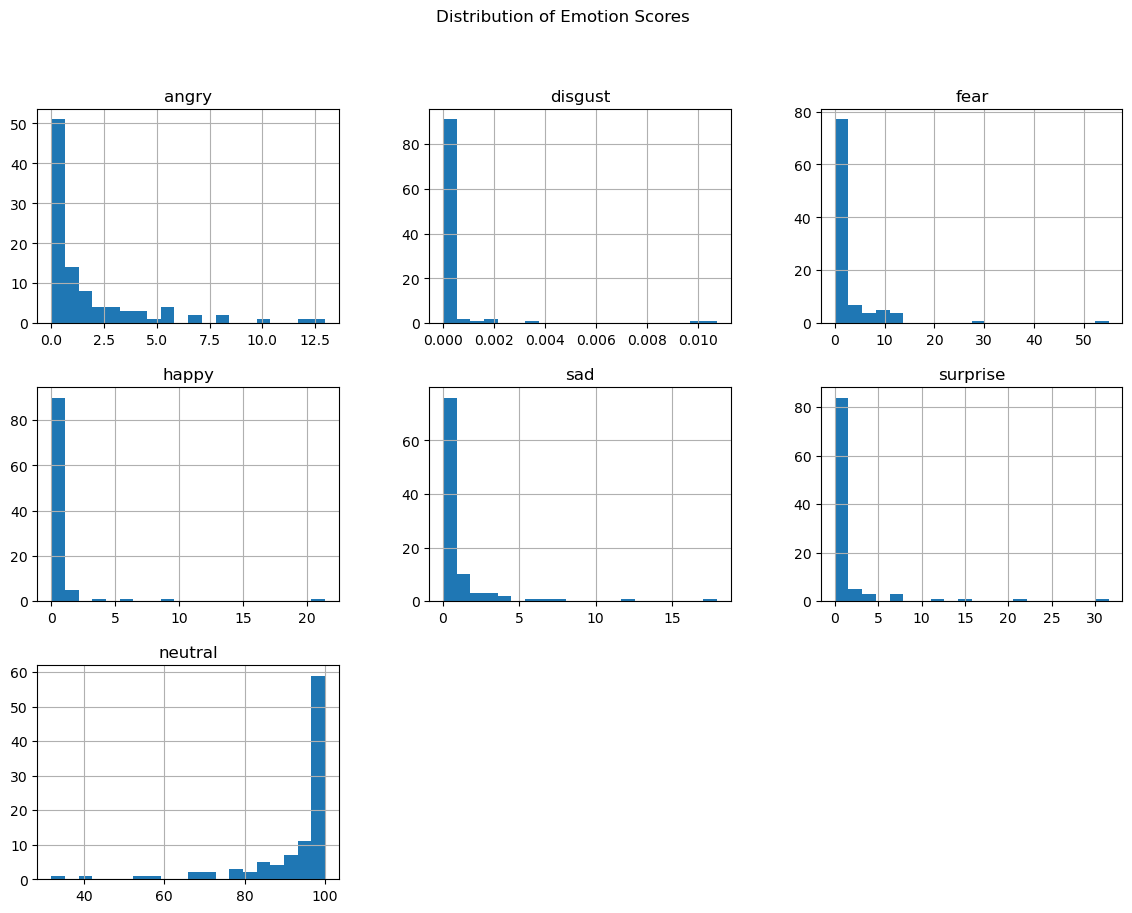


Dominant Emotion Counts:
dominant_emotion
neutral    98
fear        1
Name: count, dtype: int64


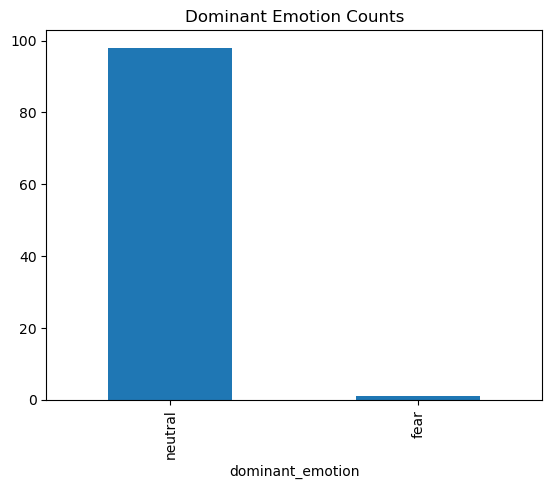


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000  0.471802  0.581159  0.063560  0.364138  0.486517 -0.780482
disgust   0.471802  1.000000  0.380642  0.047386  0.612656  0.036172 -0.450938
fear      0.581159  0.380642  1.000000  0.192141  0.278767  0.328232 -0.873142
happy     0.063560  0.047386  0.192141  1.000000  0.012081  0.046663 -0.329255
sad       0.364138  0.612656  0.278767  0.012081  1.000000 -0.067636 -0.407513
surprise  0.486517  0.036172  0.328232  0.046663 -0.067636  1.000000 -0.622424
neutral  -0.780482 -0.450938 -0.873142 -0.329255 -0.407513 -0.622424  1.000000


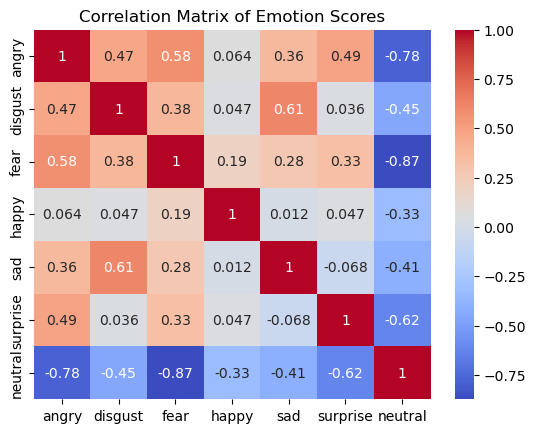

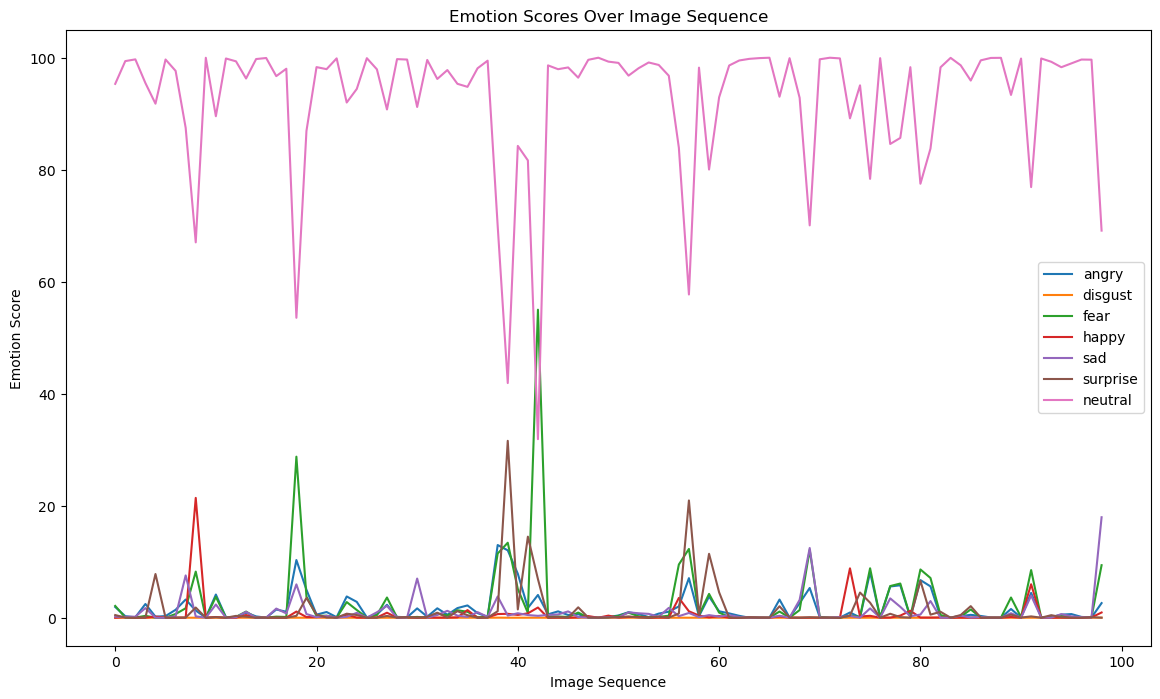

Error reading emotion_data-20240913T095942Z-001/emotion_data/4\emotion.csv: Could not convert 6b0386fc-41de-4196-b0d6-3d0b815c2dbc to numeric
Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          4 non-null      object 
 1   image_seq         4 non-null      int64  
 2   angry             4 non-null      float64
 3   disgust           4 non-null      float64
 4   fear              4 non-null      float64
 5   happy             4 non-null      float64
 6   sad               4 non-null      float64
 7   surprise          4 non-null      float64
 8   neutral           4 non-null      float64
 9   dominant_emotion  4 non-null      object 
dtypes: float64(7), int64(1), object(2)
memory usage: 448.0+ bytes
None

Statistical Summary:
       image_seq      angry       disgust      fear     happy       sad  \
count   4.

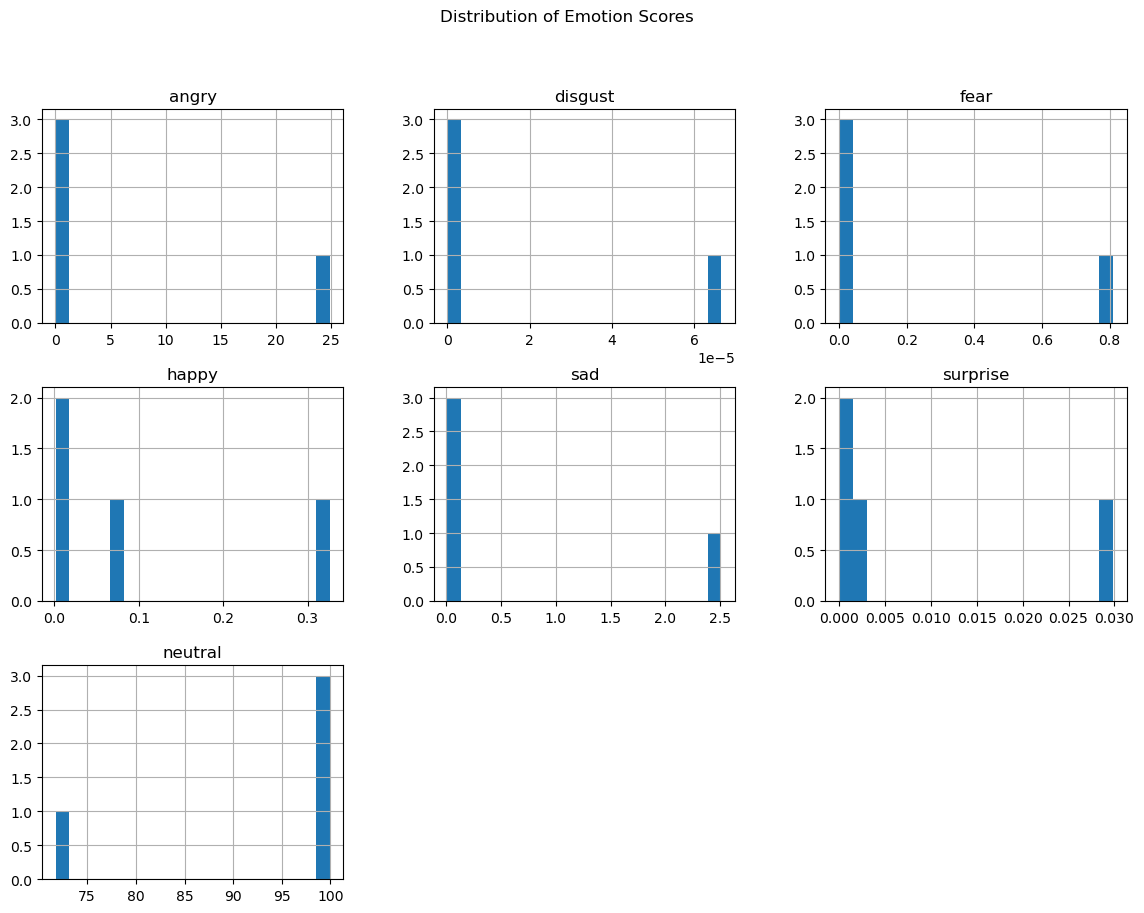


Dominant Emotion Counts:
dominant_emotion
neutral    4
Name: count, dtype: int64


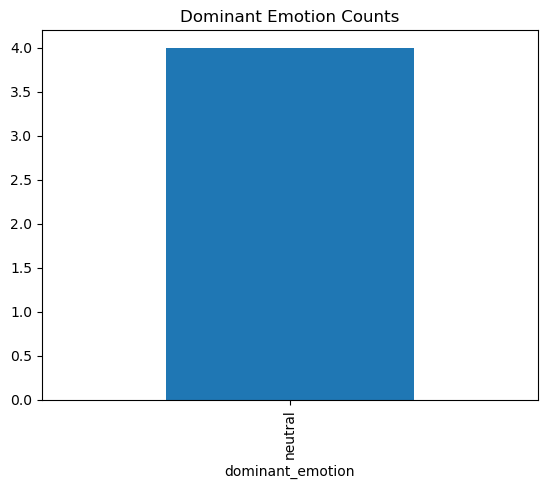


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000  0.999994  0.999996 -0.436291  0.999700  0.996992 -0.999928
disgust   0.999994  1.000000  1.000000 -0.434919  0.999714  0.997174 -0.999940
fear      0.999996  1.000000  1.000000 -0.435192  0.999710  0.997152 -0.999938
happy    -0.436291 -0.434919 -0.435192  1.000000 -0.414705 -0.455695  0.425493
sad       0.999700  0.999714  0.999710 -0.414705  1.000000  0.995728 -0.999915
surprise  0.996992  0.997174  0.997152 -0.455695  0.995728  1.000000 -0.996620
neutral  -0.999928 -0.999940 -0.999938  0.425493 -0.999915 -0.996620  1.000000


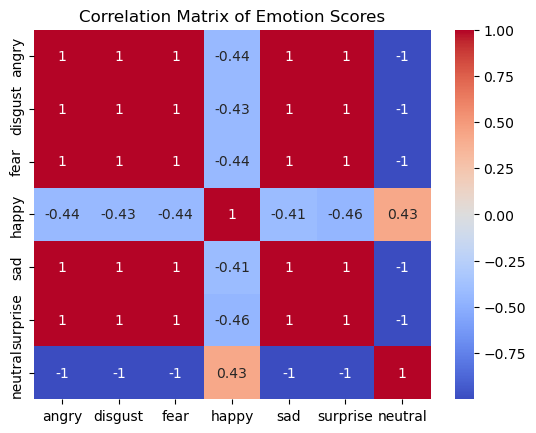

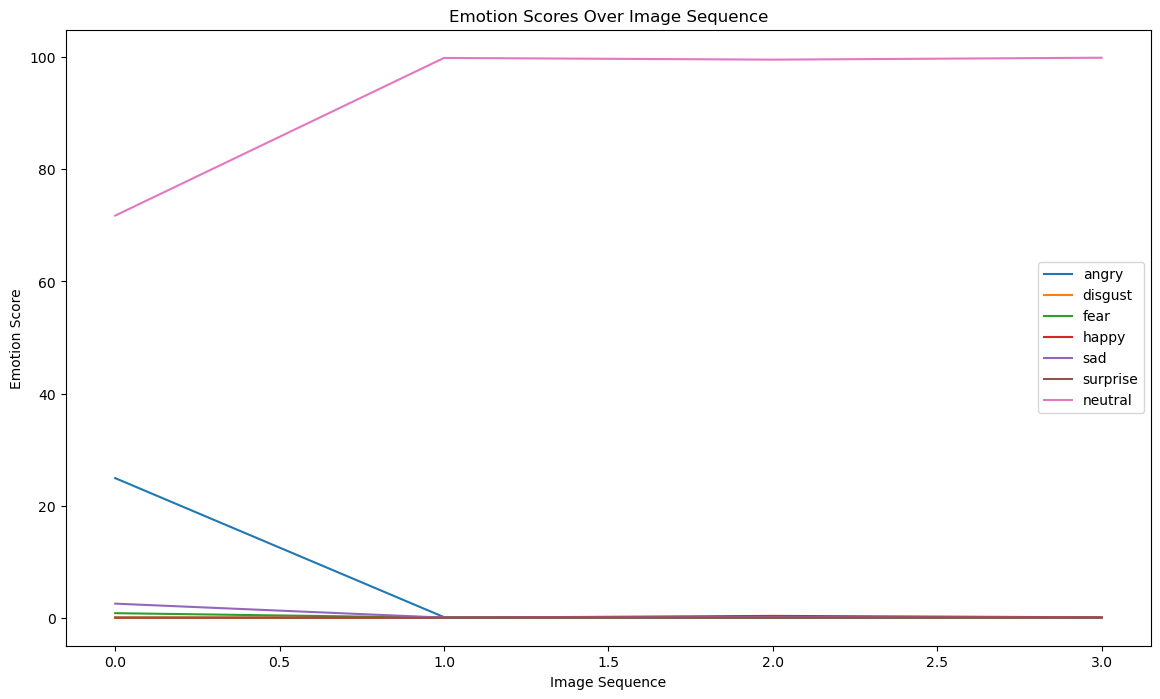

Error reading emotion_data-20240913T095942Z-001/emotion_data/5\emotion.csv: Could not convert 9c350343-e895-49df-af90-d50b91d19d3e9c350343-e895-49df-af90-d50b91d19d3e9c350343-e895-49df-af90-d50b91d19d3e9c350343-e895-49df-af90-d50b91d19d3e to numeric
Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          14 non-null     object 
 1   image_seq         14 non-null     int64  
 2   angry             14 non-null     float64
 3   disgust           14 non-null     float64
 4   fear              14 non-null     float64
 5   happy             14 non-null     float64
 6   sad               14 non-null     float64
 7   surprise          14 non-null     float64
 8   neutral           14 non-null     float64
 9   dominant_emotion  14 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 1.2+ KB
None

S

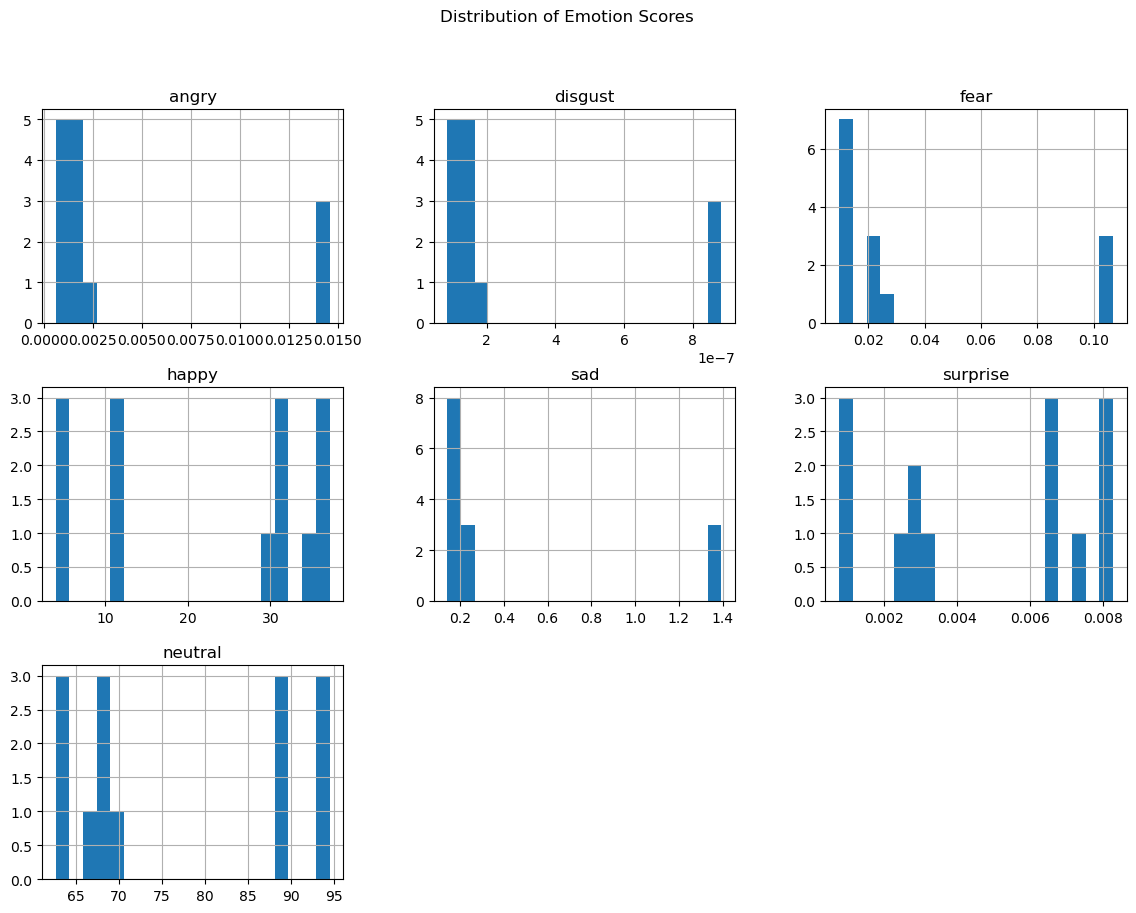


Dominant Emotion Counts:
dominant_emotion
neutral    14
Name: count, dtype: int64


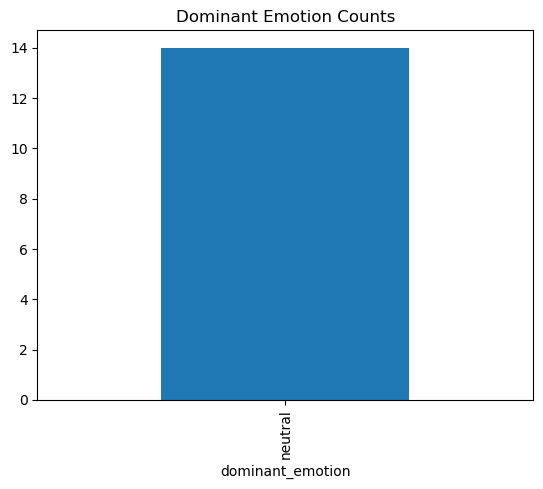


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000  0.998679  0.993508 -0.759172  0.999700 -0.728313  0.740836
disgust   0.998679  1.000000  0.994620 -0.752818  0.998585 -0.727871  0.734325
fear      0.993508  0.994620  1.000000 -0.800264  0.993300 -0.794885  0.783453
happy    -0.759172 -0.752818 -0.800264  1.000000 -0.748235  0.892689 -0.999615
sad       0.999700  0.998585  0.993300 -0.748235  1.000000 -0.727290  0.729548
surprise -0.728313 -0.727871 -0.794885  0.892689 -0.727290  1.000000 -0.889833
neutral   0.740836  0.734325  0.783453 -0.999615  0.729548 -0.889833  1.000000


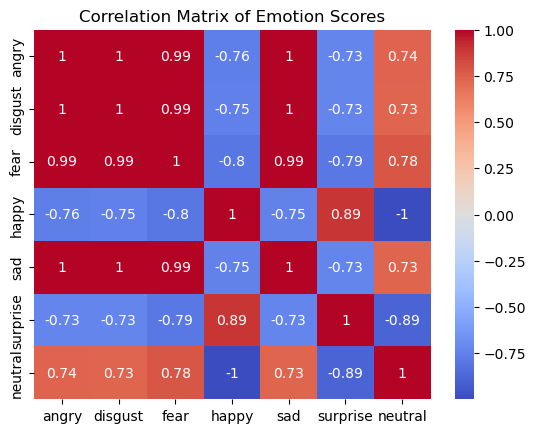

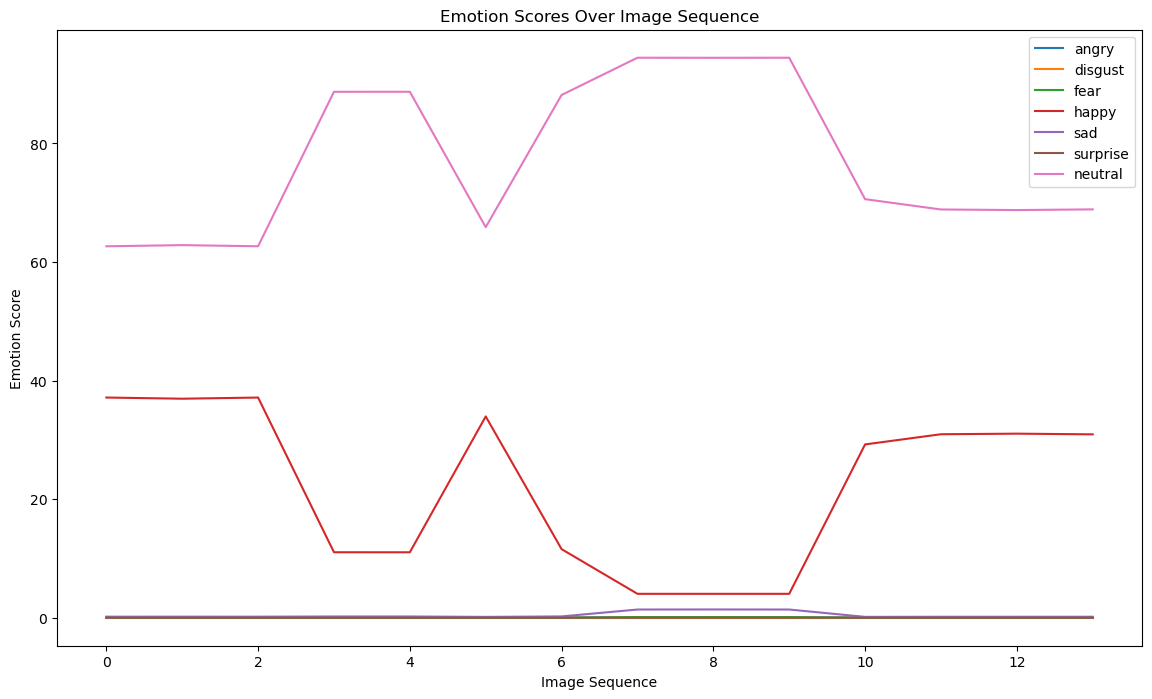

Error reading emotion_data-20240913T095942Z-001/emotion_data/6\emotion.csv: Could not convert 92016995-e455-4651-9f6e-fbca0d423f2192016995-e455-4651-9f6e-fbca0d423f2192016995-e455-4651-9f6e-fbca0d423f2192016995-e455-4651-9f6e-fbca0d423f2192016995-e455-4651-9f6e-fbca0d423f2192016995-e455-4651-9f6e-fbca0d423f2192016995-e455-4651-9f6e-fbca0d423f2192016995-e455-4651-9f6e-fbca0d423f2192016995-e455-4651-9f6e-fbca0d423f2192016995-e455-4651-9f6e-fbca0d423f2192016995-e455-4651-9f6e-fbca0d423f2192016995-e455-4651-9f6e-fbca0d423f2192016995-e455-4651-9f6e-fbca0d423f2192016995-e455-4651-9f6e-fbca0d423f21 to numeric
Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          87 non-null     object 
 1   image_seq         87 non-null     int64  
 2   angry             87 non-null     float64
 3   disgust           87 non-null    

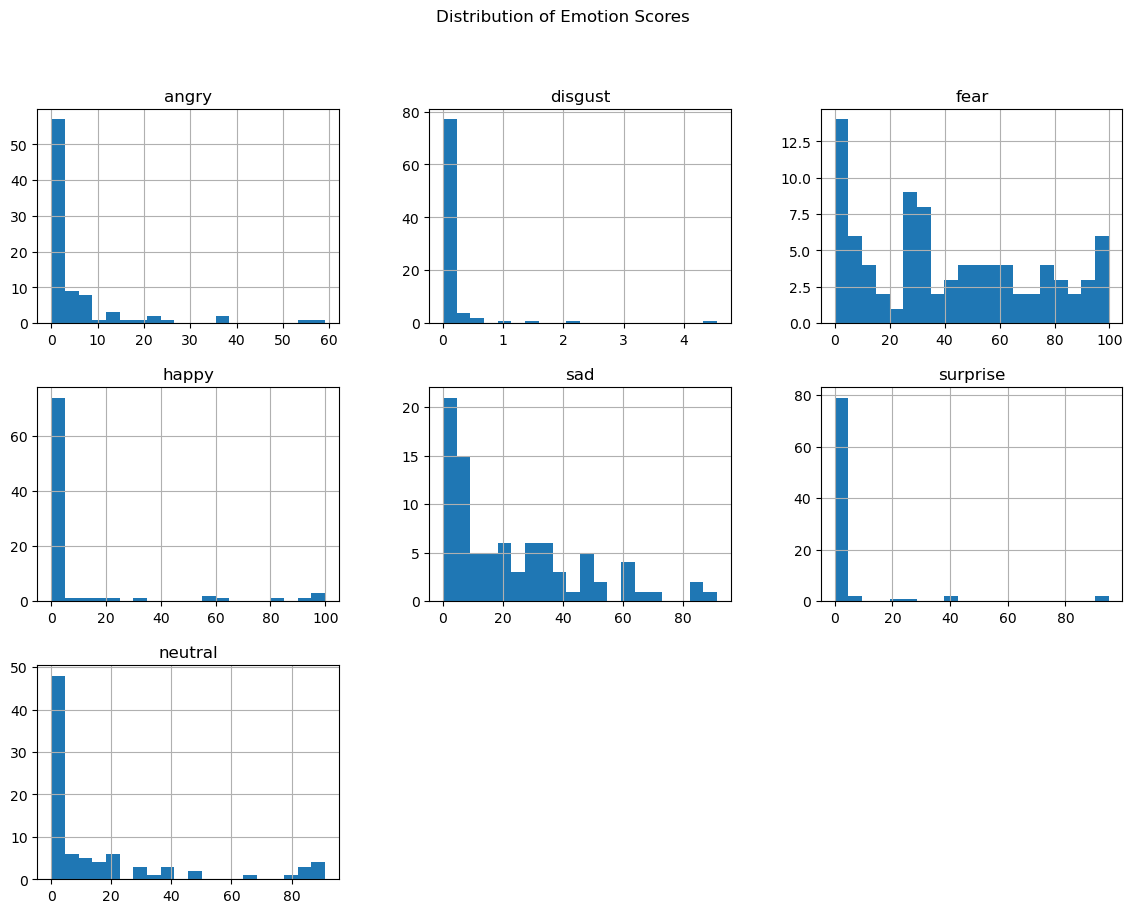


Dominant Emotion Counts:
dominant_emotion
fear        38
sad         22
neutral     13
happy        8
surprise     3
angry        3
Name: count, dtype: int64


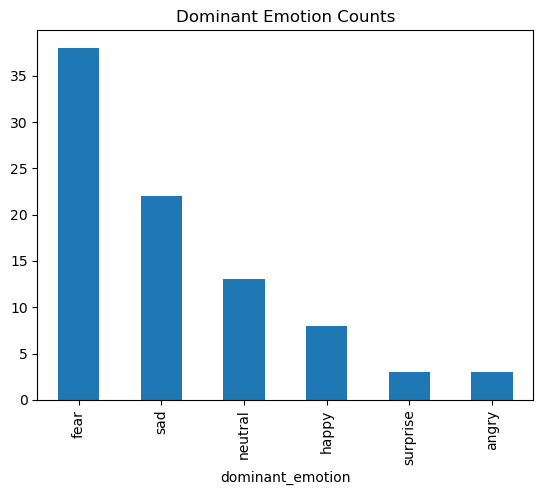


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000  0.675301 -0.156652 -0.168952  0.049635 -0.099827 -0.067903
disgust   0.675301  1.000000 -0.048774 -0.082832  0.005258 -0.060128 -0.135326
fear     -0.156652 -0.048774  1.000000 -0.325510 -0.277166 -0.129233 -0.519071
happy    -0.168952 -0.082832 -0.325510  1.000000 -0.313495 -0.074273 -0.146129
sad       0.049635  0.005258 -0.277166 -0.313495  1.000000 -0.220353 -0.139729
surprise -0.099827 -0.060128 -0.129233 -0.074273 -0.220353  1.000000 -0.137056
neutral  -0.067903 -0.135326 -0.519071 -0.146129 -0.139729 -0.137056  1.000000


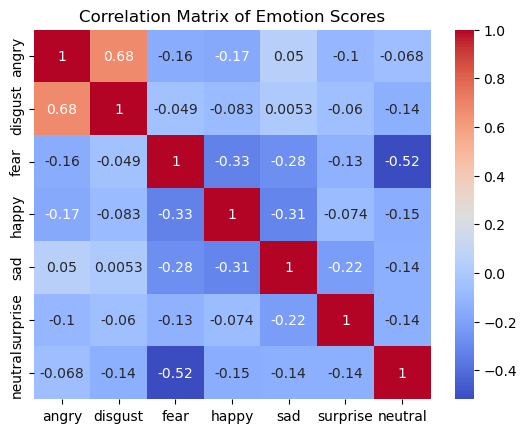

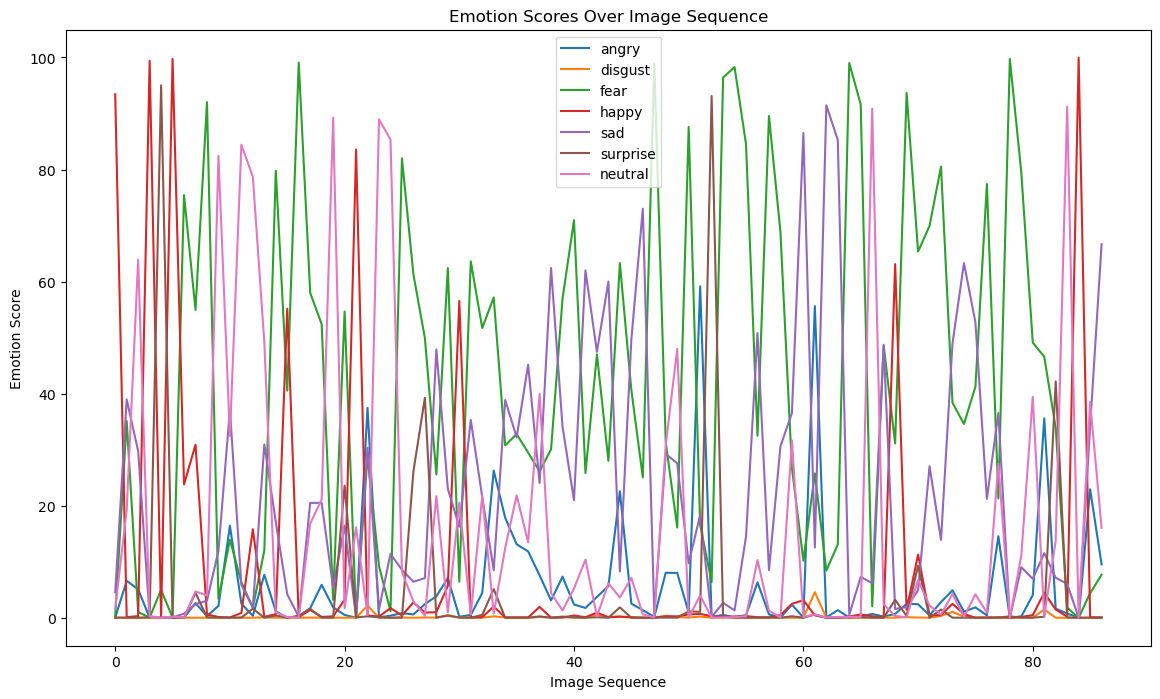

Error reading emotion_data-20240913T095942Z-001/emotion_data/7\emotion.csv: Could not convert 6539370c-256e-4ed2-9d00-1be1f051163f6539370c-256e-4ed2-9d00-1be1f051163f6539370c-256e-4ed2-9d00-1be1f051163f to numeric
Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          93 non-null     object 
 1   image_seq         93 non-null     int64  
 2   angry             93 non-null     float64
 3   disgust           93 non-null     float64
 4   fear              93 non-null     float64
 5   happy             93 non-null     float64
 6   sad               93 non-null     float64
 7   surprise          93 non-null     float64
 8   neutral           93 non-null     float64
 9   dominant_emotion  93 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 7.4+ KB
None

Statistical Summary:
       image_seq

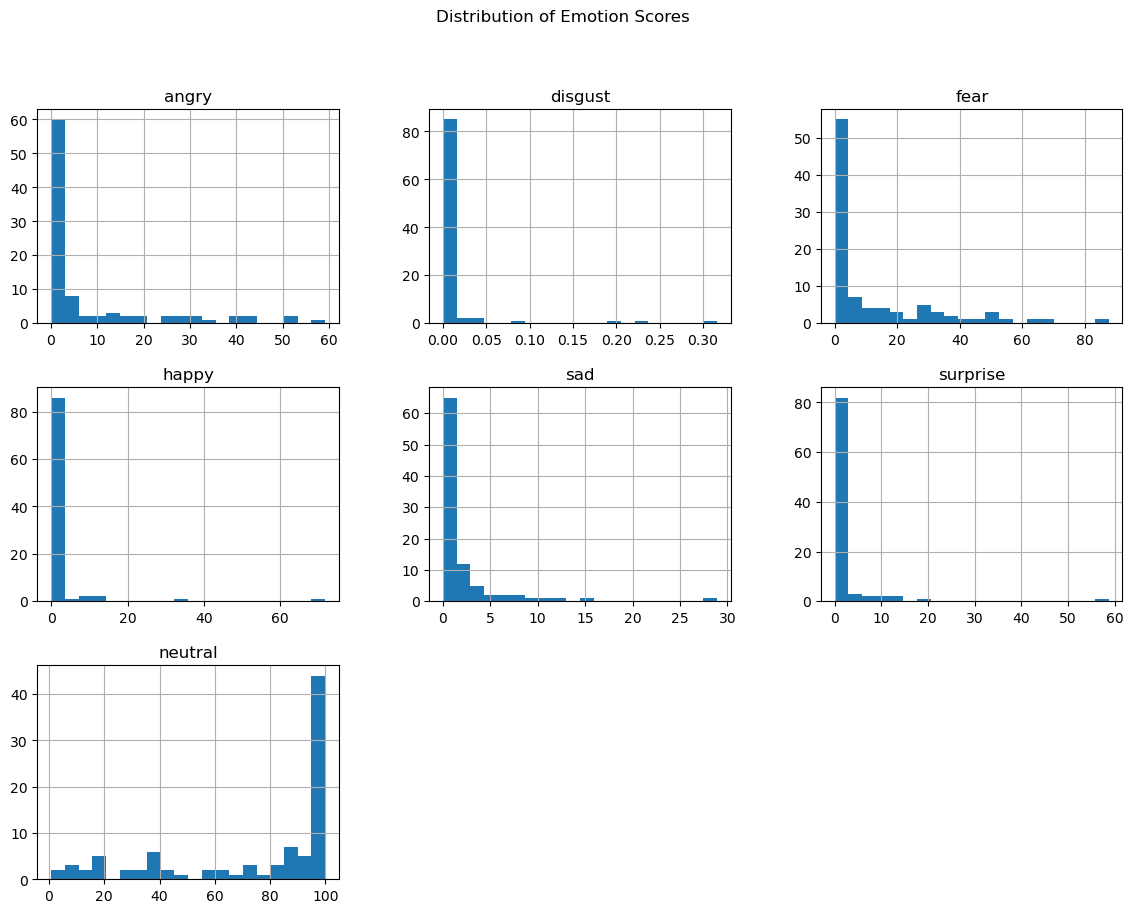


Dominant Emotion Counts:
dominant_emotion
neutral     73
fear        10
angry        7
happy        1
sad          1
surprise     1
Name: count, dtype: int64


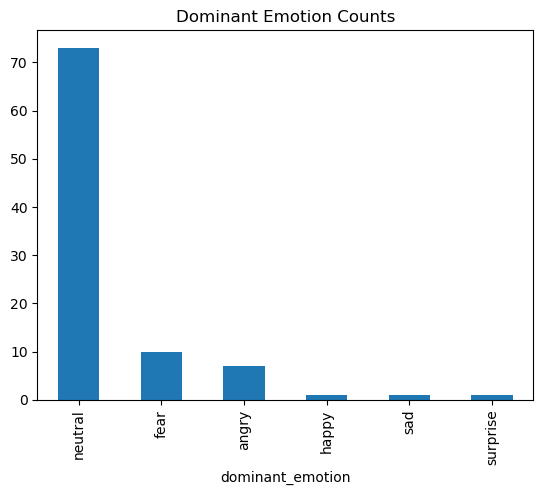


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000  0.386357  0.412618  0.009661  0.401213  0.087462 -0.740307
disgust   0.386357  1.000000  0.353140 -0.022667  0.442910  0.044537 -0.430195
fear      0.412618  0.353140  1.000000 -0.030470  0.130056  0.333435 -0.834222
happy     0.009661 -0.022667 -0.030470  1.000000  0.016946 -0.036717 -0.242736
sad       0.401213  0.442910  0.130056  0.016946  1.000000 -0.062584 -0.364011
surprise  0.087462  0.044537  0.333435 -0.036717 -0.062584  1.000000 -0.425295
neutral  -0.740307 -0.430195 -0.834222 -0.242736 -0.364011 -0.425295  1.000000


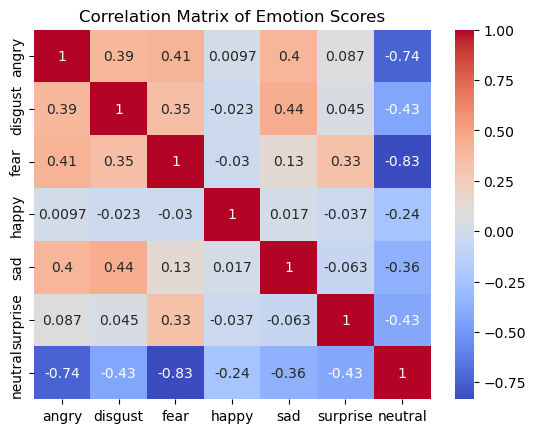

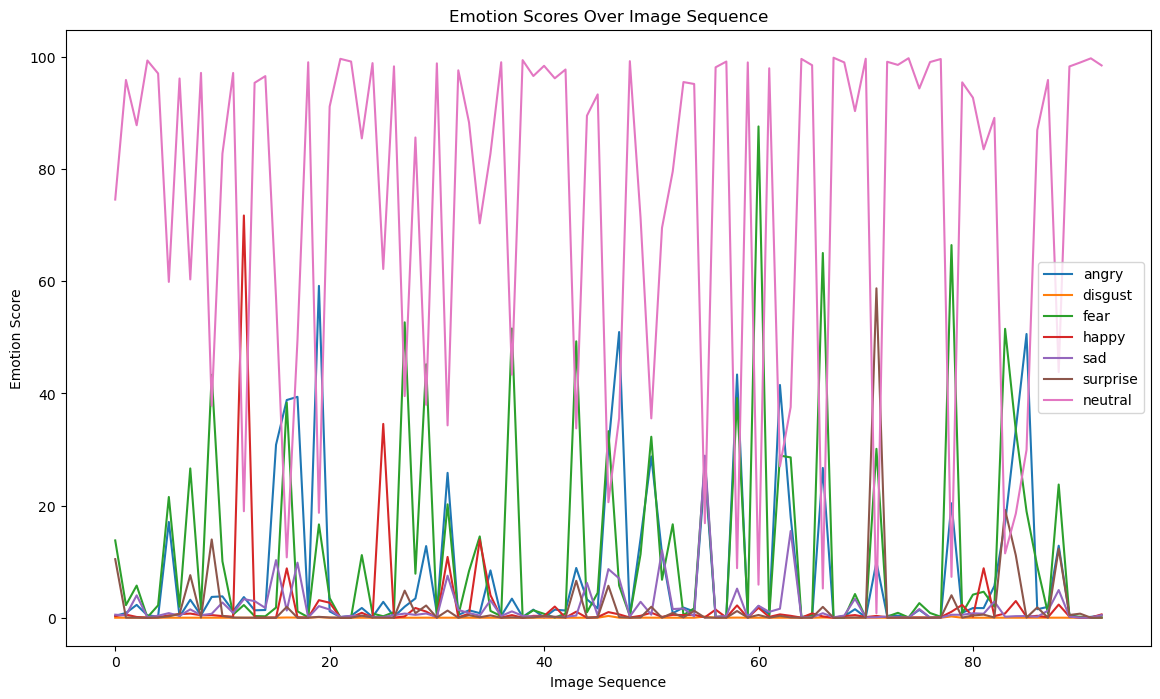

Error reading emotion_data-20240913T095942Z-001/emotion_data/8\emotion.csv: Could not convert 813af424-a584-4417-b7ee-0d4c705e83c9813af424-a584-4417-b7ee-0d4c705e83c9813af424-a584-4417-b7ee-0d4c705e83c9813af424-a584-4417-b7ee-0d4c705e83c9813af424-a584-4417-b7ee-0d4c705e83c9813af424-a584-4417-b7ee-0d4c705e83c9813af424-a584-4417-b7ee-0d4c705e83c9 to numeric
Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          86 non-null     object 
 1   image_seq         86 non-null     int64  
 2   angry             86 non-null     float64
 3   disgust           86 non-null     float64
 4   fear              86 non-null     float64
 5   happy             86 non-null     float64
 6   sad               86 non-null     float64
 7   surprise          86 non-null     float64
 8   neutral           86 non-null     float64
 9   dom

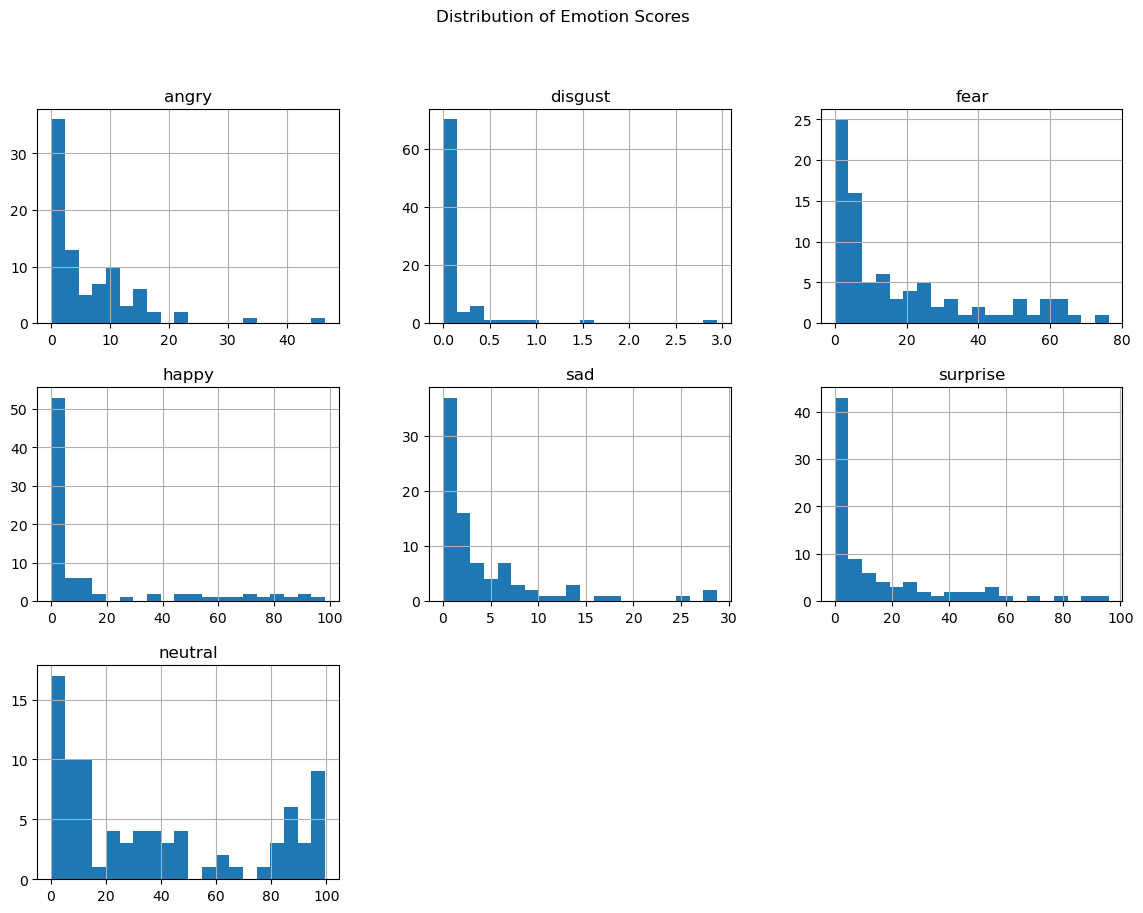


Dominant Emotion Counts:
dominant_emotion
neutral     37
happy       16
surprise    16
fear        16
angry        1
Name: count, dtype: int64


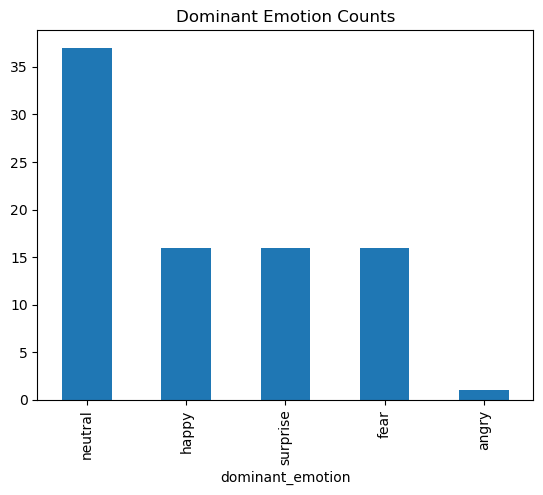


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000  0.214738  0.459845 -0.216665  0.291901 -0.083728 -0.317739
disgust   0.214738  1.000000  0.219472  0.149765  0.074241 -0.023049 -0.300970
fear      0.459845  0.219472  1.000000 -0.325162  0.102675  0.036246 -0.473755
happy    -0.216665  0.149765 -0.325162  1.000000 -0.154654 -0.110373 -0.447713
sad       0.291901  0.074241  0.102675 -0.154654  1.000000 -0.345374  0.044918
surprise -0.083728 -0.023049  0.036246 -0.110373 -0.345374  1.000000 -0.489689
neutral  -0.317739 -0.300970 -0.473755 -0.447713  0.044918 -0.489689  1.000000


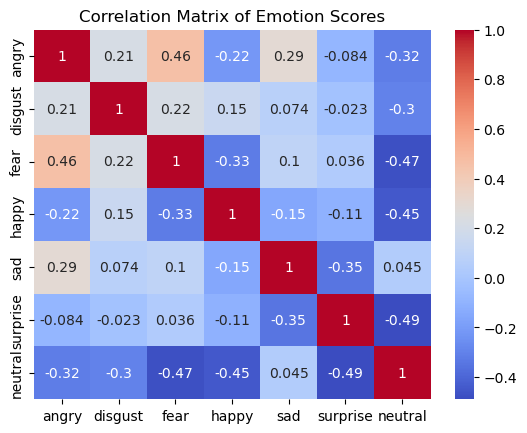

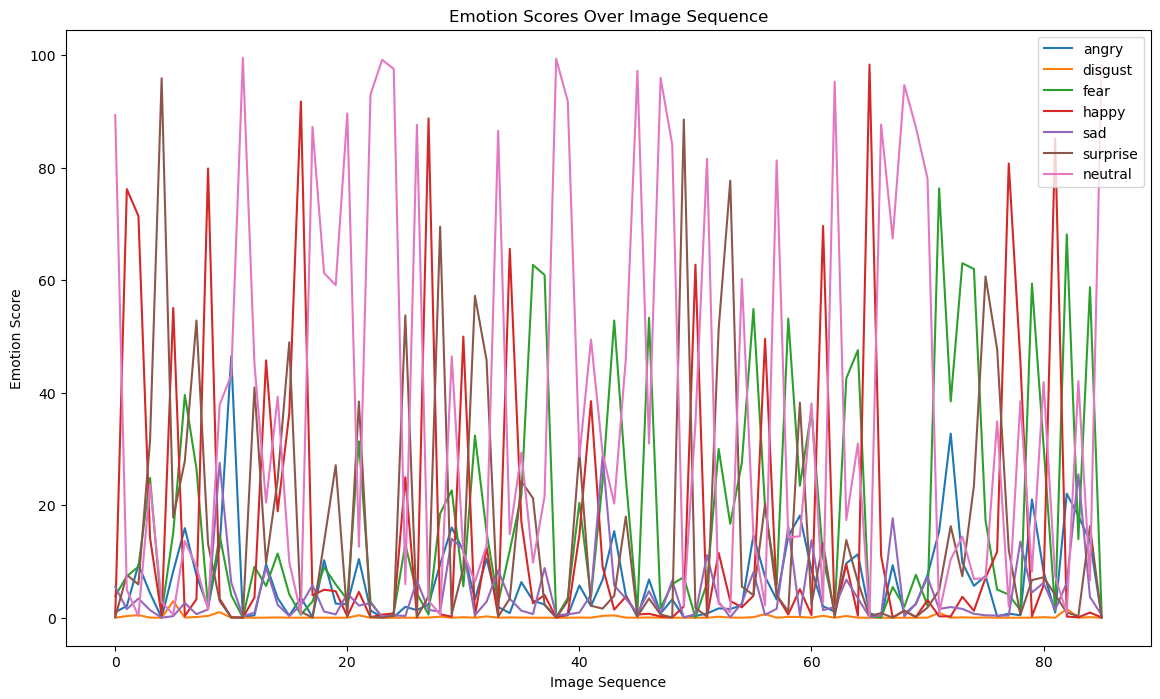

Error reading emotion_data-20240913T095942Z-001/emotion_data/9\emotion.csv: Could not convert dfb0d746-609f-4dac-8e1d-c0325fb64394 to numeric
Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          90 non-null     object 
 1   image_seq         90 non-null     int64  
 2   angry             90 non-null     float64
 3   disgust           90 non-null     float64
 4   fear              90 non-null     float64
 5   happy             90 non-null     float64
 6   sad               90 non-null     float64
 7   surprise          90 non-null     float64
 8   neutral           90 non-null     float64
 9   dominant_emotion  90 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 7.2+ KB
None

Statistical Summary:
       image_seq      angry       disgust       fear         happy        sad  \
count  

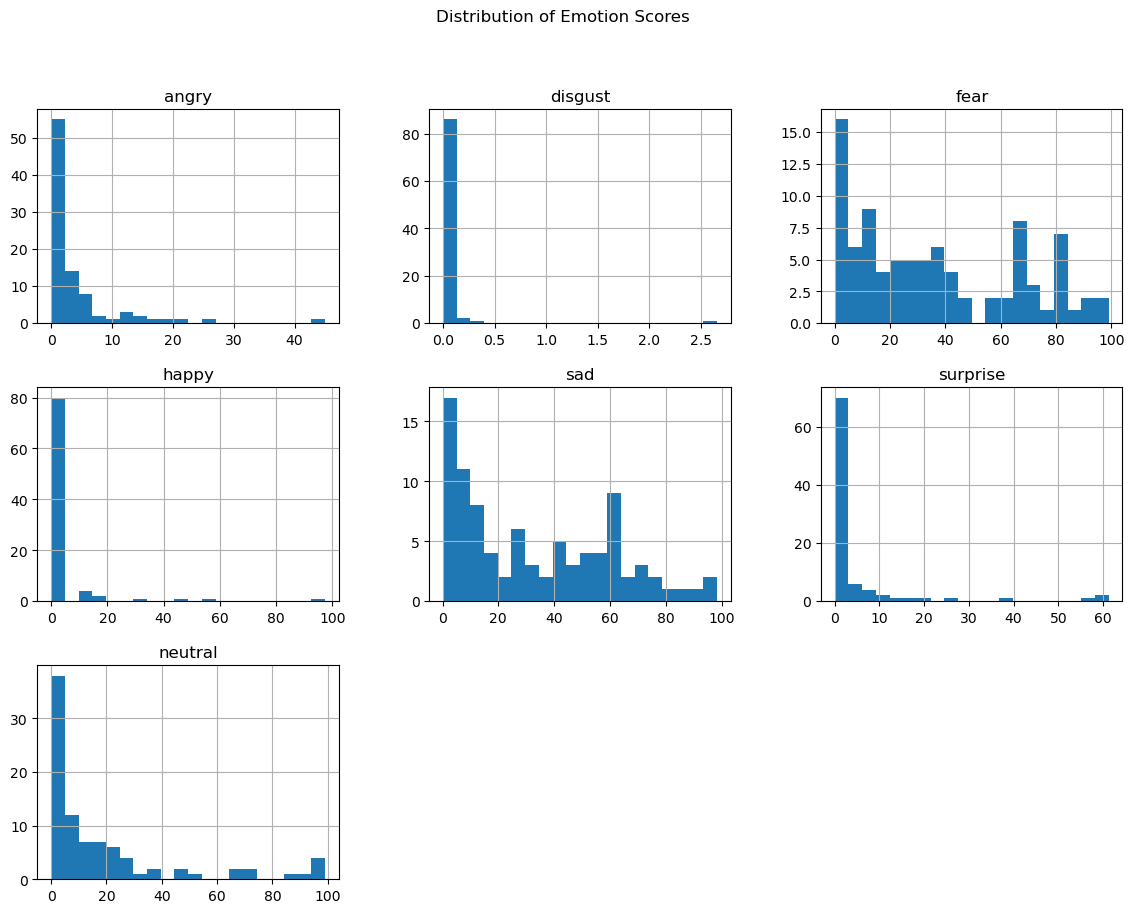


Dominant Emotion Counts:
dominant_emotion
sad         35
fear        35
neutral     13
happy        3
surprise     3
angry        1
Name: count, dtype: int64


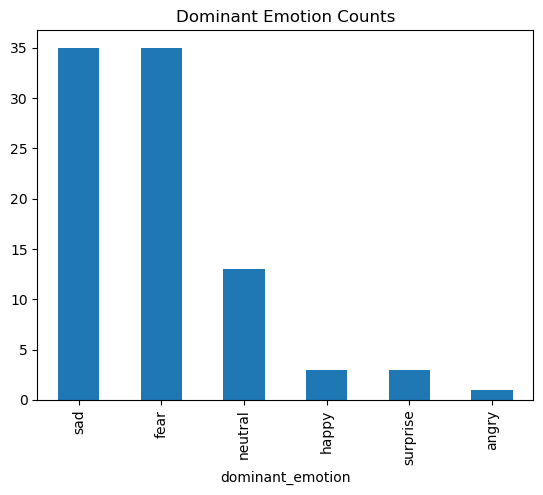


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000  0.321319 -0.029595 -0.045750 -0.027590 -0.090827 -0.136409
disgust   0.321319  1.000000  0.015100 -0.019006  0.001157 -0.038367 -0.085012
fear     -0.029595  0.015100  1.000000 -0.152918 -0.520811  0.183167 -0.575359
happy    -0.045750 -0.019006 -0.152918  1.000000 -0.202097 -0.049394 -0.086222
sad      -0.027590  0.001157 -0.520811 -0.202097  1.000000 -0.377150 -0.177750
surprise -0.090827 -0.038367  0.183167 -0.049394 -0.377150  1.000000 -0.210720
neutral  -0.136409 -0.085012 -0.575359 -0.086222 -0.177750 -0.210720  1.000000


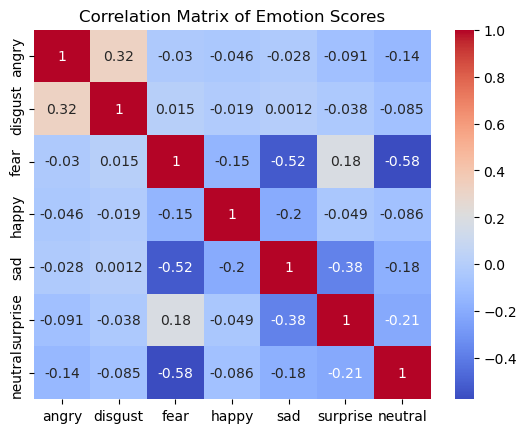

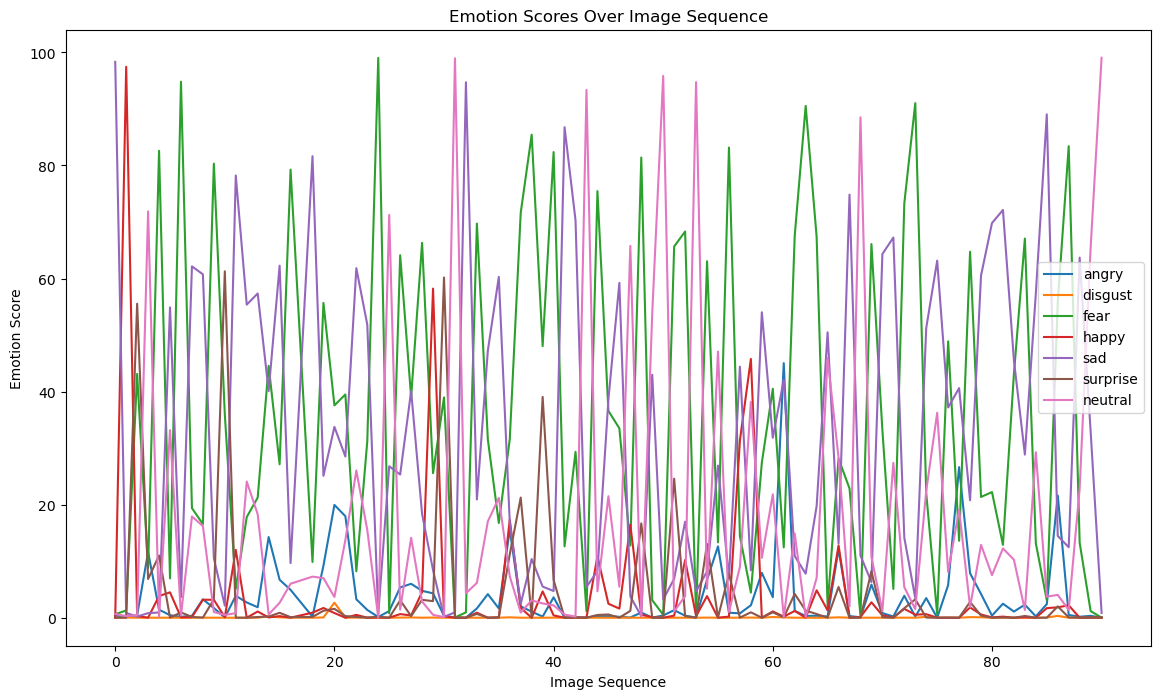

Error reading emotion_data-20240913T095942Z-001/emotion_data/10\emotion.csv: Could not convert 83c20b83-7881-499d-a40d-cc06b65869f8 to numeric


In [12]:
base_path = "emotion_data-20240913T095942Z-001/emotion_data/"

for i in range(1,11):
    file_path = os.path.join(base_path, str(i), "emotion.csv")
    
    if os.path.exists(file_path):
        try:
            emotion_df = pd.read_csv(file_path)
            emotion_eda(emotion_df)
            print(f"Data from {file_path}:")
            print(emotion_df.head())
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    else:
        print(f"File {file_path} does not exist.")


In [16]:
# import streamlit as st
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# def emotion_eda(df):
#     st.header("Emotion Data Analysis (EDA)")

#     # Basic Information
#     st.subheader("Data Summary")
#     buffer = st.empty()
#     buffer.write(df.info())

#     st.subheader("Statistical Summary")
#     st.write(df.describe())

#     # Check for Missing Values
#     st.subheader("Missing Values")
#     st.write(df.isnull().sum())

#     # Check for Duplicates
#     st.subheader("Duplicates")
#     st.write(df.duplicated().sum())

#     # Distribution of Emotion Scores
#     st.subheader("Distribution of Emotion Scores")
#     emotion_columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
#     fig, ax = plt.subplots(figsize=(14, 10))
#     df[emotion_columns].hist(bins=20, ax=ax)
#     st.pyplot(fig)

#     # Dominant Emotion Analysis
#     st.subheader("Dominant Emotion Counts")
#     dominant_emotion_counts = df['dominant_emotion'].value_counts()
#     st.write(dominant_emotion_counts)
#     fig, ax = plt.subplots()
#     dominant_emotion_counts.plot(kind='bar', ax=ax, title='Dominant Emotion Counts')
#     st.pyplot(fig)

#     # Correlation Analysis
#     st.subheader("Correlation Matrix of Emotion Scores")
#     correlation_matrix = df[emotion_columns].corr()
#     st.write(correlation_matrix)
#     fig, ax = plt.subplots()
#     sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
#     st.pyplot(fig)

#     # Temporal or Sequential Analysis
#     st.subheader("Emotion Scores Over Image Sequence")
#     fig, ax = plt.subplots(figsize=(14, 8))
#     for emotion in emotion_columns:
#         ax.plot(df['image_seq'], df[emotion], label=emotion)
#     ax.set_xlabel('Image Sequence')
#     ax.set_ylabel('Emotion Score')
#     ax.set_title('Emotion Scores Over Image Sequence')
#     ax.legend()
#     st.pyplot(fig)

#     # Group Analysis by Dominant Emotion
#     st.subheader("Average Emotion Scores by Dominant Emotion")
#     grouped = df.groupby('dominant_emotion').mean()
#     st.write(grouped)
#     fig, ax = plt.subplots(figsize=(14, 8))
#     grouped[emotion_columns].plot(kind='bar', ax=ax)
#     ax.set_title('Average Emotion Scores by Dominant Emotion')
#     st.pyplot(fig)

# # To run this in Streamlit:
# # Save your CSV as df and use:
# # df = pd.read_csv('yourfile.csv')
# # emotion_eda(df)


In [17]:
df_emotion['dominant_emotion'].value_counts()

dominant_emotion
neutral     37
fear        19
angry       11
sad         10
surprise     7
happy        3
Name: count, dtype: int64

In [18]:
df_gaze.head(2)

movie_id  image_seq  gaze  blink  eye_offset
0  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          1     1      0      6.2253
1  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          2     1      0     22.7274

In [19]:
folder_path = 'transcript_data'

average_dfs = []

for f in os.listdir(folder_path):
    id = int(f.split('.')[0])  
    file_path = os.path.join(folder_path, f)
    features = ['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']
    df = pd.read_csv(file_path, usecols=features)

    new_features = ['avg_positive', 'avg_negative', 'avg_neutral', 'avg_confident', 'avg_hesitant', 'avg_concise', 'avg_enthusiastic', 'avg_speech_speed']
    avg_values = df[features].mean().values
    
    new_df = pd.DataFrame([avg_values], columns=new_features, index=[id])
    
    average_dfs.append(new_df)

final_df = pd.concat(average_dfs)
final_df = final_df.sort_index()

final_df.head(10)


avg_positive  avg_negative  avg_neutral  avg_confident  avg_hesitant  \
1       0.709199      0.141214     0.149586       0.733828      0.485172   
2       0.722006      0.107541     0.170453       0.684879      0.436158   
3       0.567257      0.264337     0.168406       0.573566      0.604004   
4       0.655748      0.169142     0.175110       0.621740      0.570452   
5       0.630573      0.187013     0.182414       0.590094      0.461488   
6       0.711182      0.138992     0.149826       0.679755      0.490252   
7       0.717354      0.140232     0.142414       0.703714      0.457070   
8       0.605402      0.192292     0.202306       0.555011      0.507622   
9       0.617353      0.223949     0.158699       0.591842      0.538732   
10      0.589267      0.220948     0.189785       0.619852      0.520637   

    avg_concise  avg_enthusiastic  avg_speech_speed  
1      0.429418          0.466497          3.113771  
2      0.484221          0.516685          3.269092  
3      0.394715          0.448050          3.385636  
4      0.403479          0.440626          2.775454  
5      0.413644          0.378110          2.817341  
6      0.367792          0.481433          2.583163  
7      0.398571          0.463940          2.284897  
8      0.352011          0.437399          2.902953  
9      0.381809          0.505152          3.329938  
10     0.385655          0.325507          3.248518

In [20]:
final_df.to_csv('final_df.csv', index=True)

In [21]:
folder_path = 'emotion_data'

dominant_emotions = {'student_top1': [], 'student_top2': []}

for i in range(1, 11):
    file_name = f'{i}/emotion.csv'
    file_path = os.path.join(folder_path, file_name)
    
    df = pd.read_csv(file_path)

    top_emotions = df['dominant_emotion'].value_counts().nlargest(2).index.tolist()
    
    dominant_emotions['student_top1'].append(top_emotions[0] if len(top_emotions) > 0 else "neutral")
    dominant_emotions['student_top2'].append(top_emotions[1] if len(top_emotions) > 1 else "neutral")

df_dominantEmotion_for_everystudent = pd.DataFrame(dominant_emotions)

df_dominantEmotion_for_everystudent.columns = [
    f'dominant_emotion_top1' if 'top1' in col else f'dominant_emotion_top2'
    for i, col in enumerate(df_dominantEmotion_for_everystudent.columns, start=1)
]

df_dominantEmotion_for_everystudent.index = range(1, 11)
df_dominantEmotion_for_everystudent.head(10)


dominant_emotion_top1 dominant_emotion_top2
1                neutral                  fear
2                  happy               neutral
3                neutral                  fear
4                neutral                  fear
5                neutral               neutral
6                neutral               neutral
7                   fear                   sad
8                neutral                  fear
9                neutral                 happy
10                   sad                  fear

In [22]:
final_df_with_emotions = pd.concat([final_df, df_dominantEmotion_for_everystudent], axis=1)

# Print the final merged DataFrame
final_df_with_emotions.head(2)


avg_positive  avg_negative  avg_neutral  avg_confident  avg_hesitant  \
1      0.709199      0.141214     0.149586       0.733828      0.485172   
2      0.722006      0.107541     0.170453       0.684879      0.436158   

   avg_concise  avg_enthusiastic  avg_speech_speed dominant_emotion_top1  \
1     0.429418          0.466497          3.113771               neutral   
2     0.484221          0.516685          3.269092                 happy   

  dominant_emotion_top2  
1                  fear  
2               neutral

In [23]:
final_df_with_emotions.to_csv('final_df.csv', index=True)

In [24]:
df_gaze.head(15)

movie_id  image_seq  gaze  blink  eye_offset
0   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          1     1      0      6.2253
1   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          2     1      0     22.7274
2   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          3     1      0      2.5704
3   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          4     1      0     21.1097
4   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          5     1      0      1.8453
5   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          6     0      0     26.8643
6   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          7     1      0      1.9027
7   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          8     0      0     40.3364
8   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          9     0      0     48.6695
9   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         10     1      0     -2.5612
10  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         11     0      0     32.5426
11  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         12     1      0      5.4381
12  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         13     1      0     -2.2343
13  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         14     0      0     28.1631
14  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a         15     0      0     26.6346

In [25]:
df= pd.read_csv("final_df.csv")
df.head(10)

Unnamed: 0  avg_positive  avg_negative  avg_neutral  avg_confident  \
0           1      0.709199      0.141214     0.149586       0.733828   
1           2      0.722006      0.107541     0.170453       0.684879   
2           3      0.567257      0.264337     0.168406       0.573566   
3           4      0.655748      0.169142     0.175110       0.621740   
4           5      0.630573      0.187013     0.182414       0.590094   
5           6      0.711182      0.138992     0.149826       0.679755   
6           7      0.717354      0.140232     0.142414       0.703714   
7           8      0.605402      0.192292     0.202306       0.555011   
8           9      0.617353      0.223949     0.158699       0.591842   
9          10      0.589267      0.220948     0.189785       0.619852   

   avg_hesitant  avg_concise  avg_enthusiastic  avg_speech_speed  \
0      0.485172     0.429418          0.466497          3.113771   
1      0.436158     0.484221          0.516685          3.269092   
2      0.604004     0.394715          0.448050          3.385636   
3      0.570452     0.403479          0.440626          2.775454   
4      0.461488     0.413644          0.378110          2.817341   
5      0.490252     0.367792          0.481433          2.583163   
6      0.457070     0.398571          0.463940          2.284897   
7      0.507622     0.352011          0.437399          2.902953   
8      0.538732     0.381809          0.505152          3.329938   
9      0.520637     0.385655          0.325507          3.248518   

  dominant_emotion_top1 dominant_emotion_top2  
0               neutral                  fear  
1                 happy               neutral  
2               neutral                  fear  
3               neutral                  fear  
4               neutral               neutral  
5               neutral               neutral  
6                  fear                   sad  
7               neutral                  fear  
8               neutral                 happy  
9                   sad                  fear

In [26]:
# standardize the df['avg_speech_speed] column
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['avg_speech_speed'] = scaler.fit_transform(df[['avg_speech_speed']])
df.head(10)

Unnamed: 0  avg_positive  avg_negative  avg_neutral  avg_confident  \
0           1      0.709199      0.141214     0.149586       0.733828   
1           2      0.722006      0.107541     0.170453       0.684879   
2           3      0.567257      0.264337     0.168406       0.573566   
3           4      0.655748      0.169142     0.175110       0.621740   
4           5      0.630573      0.187013     0.182414       0.590094   
5           6      0.711182      0.138992     0.149826       0.679755   
6           7      0.717354      0.140232     0.142414       0.703714   
7           8      0.605402      0.192292     0.202306       0.555011   
8           9      0.617353      0.223949     0.158699       0.591842   
9          10      0.589267      0.220948     0.189785       0.619852   

   avg_hesitant  avg_concise  avg_enthusiastic  avg_speech_speed  \
0      0.485172     0.429418          0.466497          0.416344   
1      0.436158     0.484221          0.516685          0.869530   
2      0.604004     0.394715          0.448050          1.209575   
3      0.570452     0.403479          0.440626         -0.570773   
4      0.461488     0.413644          0.378110         -0.448559   
5      0.490252     0.367792          0.481433         -1.131826   
6      0.457070     0.398571          0.463940         -2.002086   
7      0.507622     0.352011          0.437399         -0.198767   
8      0.538732     0.381809          0.505152          1.047063   
9      0.520637     0.385655          0.325507          0.809499   

  dominant_emotion_top1 dominant_emotion_top2  
0               neutral                  fear  
1                 happy               neutral  
2               neutral                  fear  
3               neutral                  fear  
4               neutral               neutral  
5               neutral               neutral  
6                  fear                   sad  
7               neutral                  fear  
8               neutral                 happy  
9                   sad                  fear

In [27]:
folder_path = 'emotion_data'
dfs= []
for i in range(1, 11):
    file_name = f'{i}/gaze.csv'
    file_path = os.path.join(folder_path, file_name)
    
    df = pd.read_csv(file_path)
    aggregated_df = df.groupby('movie_id').agg({
        'gaze': 'mean',          # Average gaze data over all frames
        'blink': 'sum',          # Total blinks across all frames
        'eye_offset': ['mean',   # Average eye_offset over the entire video
                       'max',    # Maximum eye_offset
                       'min',    # Minimum eye_offset
                       'std'],   # Standard deviation of eye_offset
        'image_seq': 'count'     # Count the number of frames
    }).reset_index()
    aggregated_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in aggregated_df.columns]
    dfs.append(aggregated_df)
    aggregated_df.head(2)

    
# print(dfs)

final_gaze_df = pd.concat(dfs)


In [28]:
final_df_with_emotions.head(2)

avg_positive  avg_negative  avg_neutral  avg_confident  avg_hesitant  \
1      0.709199      0.141214     0.149586       0.733828      0.485172   
2      0.722006      0.107541     0.170453       0.684879      0.436158   

   avg_concise  avg_enthusiastic  avg_speech_speed dominant_emotion_top1  \
1     0.429418          0.466497          3.113771               neutral   
2     0.484221          0.516685          3.269092                 happy   

  dominant_emotion_top2  
1                  fear  
2               neutral

In [29]:
final_df_with_emotions.describe()

avg_positive  avg_negative  avg_neutral  avg_confident  avg_hesitant  \
count     10.000000     10.000000    10.000000      10.000000     10.000000   
mean       0.652534      0.178566     0.168900       0.635428      0.507159   
std        0.058600      0.048346     0.019202       0.060950      0.052672   
min        0.567257      0.107541     0.142414       0.555011      0.436158   
25%        0.608390      0.140478     0.152044       0.590531      0.467409   
50%        0.643161      0.178077     0.169430       0.620796      0.498937   
75%        0.710686      0.213784     0.180588       0.683598      0.534208   
max        0.722006      0.264337     0.202306       0.733828      0.604004   

       avg_concise  avg_enthusiastic  avg_speech_speed  
count    10.000000         10.000000         10.000000  
mean      0.401131          0.446340          2.971076  
std       0.036592          0.057471          0.361271  
min       0.352011          0.325507          2.284897  
25%       0.382770          0.438206          2.785926  
50%       0.396643          0.455995          3.008362  
75%       0.411103          0.477699          3.263949  
max       0.484221          0.516685          3.385636

In [27]:
final_gaze_df.head(10)

movie_id_  gaze_mean  blink_sum  \
0  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a   0.625000          0   
0  baa26895-85b2-465b-a972-649b41d9870e   0.609195          4   
0  d0b9170b-98b9-48e1-a1b2-1d661bb0d853   0.450000          7   
0  6b0386fc-41de-4196-b0d6-3d0b815c2dbc   0.787879         21   
0  9c350343-e895-49df-af90-d50b91d19d3e   1.000000          1   
0  92016995-e455-4651-9f6e-fbca0d423f21   1.000000          0   
0  6539370c-256e-4ed2-9d00-1be1f051163f   0.781609         19   
0  813af424-a584-4417-b7ee-0d4c705e83c9   0.946237          3   
0  dfb0d746-609f-4dac-8e1d-c0325fb64394   0.965116          2   
0  83c20b83-7881-499d-a40d-cc06b65869f8   0.733333         15   

   eye_offset_mean  eye_offset_max  eye_offset_min  eye_offset_std  \
0        15.801362         65.0276        -33.4655       17.858517   
0        21.768546         67.6710        -15.2405       15.619435   
0        30.137213         91.2347         -4.0080       18.909401   
0        12.492482         77.7629         -7.9509       20.419822   
0       -15.802625         -8.4059        -22.6020        5.849439   
0        -1.707193         -1.1633         -2.1463        0.322101   
0         9.456552         89.7745        -35.8043       25.453533   
0         6.564640         69.9832        -15.0501       11.373373   
0         8.586290         37.4006        -17.5304        9.477504   
0        11.498590         56.9147        -24.9696       17.923358   

   image_seq_count  
0               88  
0               87  
0              100  
0               99  
0                4  
0               14  
0               87  
0               93  
0               86  
0               90

In [28]:
final_gaze_df.index = range(1, 11)
# rename the gaze_mean as gaze_score
final_gaze_df.rename(columns={"gaze_mean": "gaze_score"}, inplace=True)

In [26]:
final_gaze_df.head(10)

movie_id_  gaze_score  blink_sum  \
1   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a    0.625000          0   
2   baa26895-85b2-465b-a972-649b41d9870e    0.609195          4   
3   d0b9170b-98b9-48e1-a1b2-1d661bb0d853    0.450000          7   
4   6b0386fc-41de-4196-b0d6-3d0b815c2dbc    0.787879         21   
5   9c350343-e895-49df-af90-d50b91d19d3e    1.000000          1   
6   92016995-e455-4651-9f6e-fbca0d423f21    1.000000          0   
7   6539370c-256e-4ed2-9d00-1be1f051163f    0.781609         19   
8   813af424-a584-4417-b7ee-0d4c705e83c9    0.946237          3   
9   dfb0d746-609f-4dac-8e1d-c0325fb64394    0.965116          2   
10  83c20b83-7881-499d-a40d-cc06b65869f8    0.733333         15   

    eye_offset_mean  eye_offset_max  eye_offset_min  eye_offset_std  \
1         15.801362         65.0276        -33.4655       17.858517   
2         21.768546         67.6710        -15.2405       15.619435   
3         30.137213         91.2347         -4.0080       18.909401   
4         12.492482         77.7629         -7.9509       20.419822   
5        -15.802625         -8.4059        -22.6020        5.849439   
6         -1.707193         -1.1633         -2.1463        0.322101   
7          9.456552         89.7745        -35.8043       25.453533   
8          6.564640         69.9832        -15.0501       11.373373   
9          8.586290         37.4006        -17.5304        9.477504   
10        11.498590         56.9147        -24.9696       17.923358   

    image_seq_count  
1                88  
2                87  
3               100  
4                99  
5                 4  
6                14  
7                87  
8                93  
9                86  
10               90

In [27]:
# Since the blinking rate will depend on the amount of time of video, i have to divided the blink_sum with elapsed time of the video to get the blink rate.\\

#    \textbf{Blink Rate = blink\_sum / elapsed time}\\

#    elapsed time is given in metadeta.csv file.


for i in range(1,11):
    df= pd.read_csv(f"emotion_data/{i}/gaze.csv")
    # last row of the dataframe and then print elapsed time value
    et= len(df)
    # print(f"Elapsed time for student {i} is {elapsed_time}")
    final_gaze_df.loc[i, 'blink_sum'] = 100*(final_gaze_df.loc[i, 'blink_sum'] / et)

final_gaze_df.head(10)

movie_id_  gaze_score  blink_sum  \
1   93663f94-bf0a-4ce8-a29a-a5236cc7fe6a    0.625000   0.000000   
2   baa26895-85b2-465b-a972-649b41d9870e    0.609195   4.597701   
3   d0b9170b-98b9-48e1-a1b2-1d661bb0d853    0.450000   7.000000   
4   6b0386fc-41de-4196-b0d6-3d0b815c2dbc    0.787879  21.212121   
5   9c350343-e895-49df-af90-d50b91d19d3e    1.000000  25.000000   
6   92016995-e455-4651-9f6e-fbca0d423f21    1.000000   0.000000   
7   6539370c-256e-4ed2-9d00-1be1f051163f    0.781609  21.839080   
8   813af424-a584-4417-b7ee-0d4c705e83c9    0.946237   3.225806   
9   dfb0d746-609f-4dac-8e1d-c0325fb64394    0.965116   2.325581   
10  83c20b83-7881-499d-a40d-cc06b65869f8    0.733333  16.666667   

    eye_offset_mean  eye_offset_max  eye_offset_min  eye_offset_std  \
1         15.801362         65.0276        -33.4655       17.858517   
2         21.768546         67.6710        -15.2405       15.619435   
3         30.137213         91.2347         -4.0080       18.909401   
4         12.492482         77.7629         -7.9509       20.419822   
5        -15.802625         -8.4059        -22.6020        5.849439   
6         -1.707193         -1.1633         -2.1463        0.322101   
7          9.456552         89.7745        -35.8043       25.453533   
8          6.564640         69.9832        -15.0501       11.373373   
9          8.586290         37.4006        -17.5304        9.477504   
10        11.498590         56.9147        -24.9696       17.923358   

    image_seq_count  
1                88  
2                87  
3               100  
4                99  
5                 4  
6                14  
7                87  
8                93  
9                86  
10               90

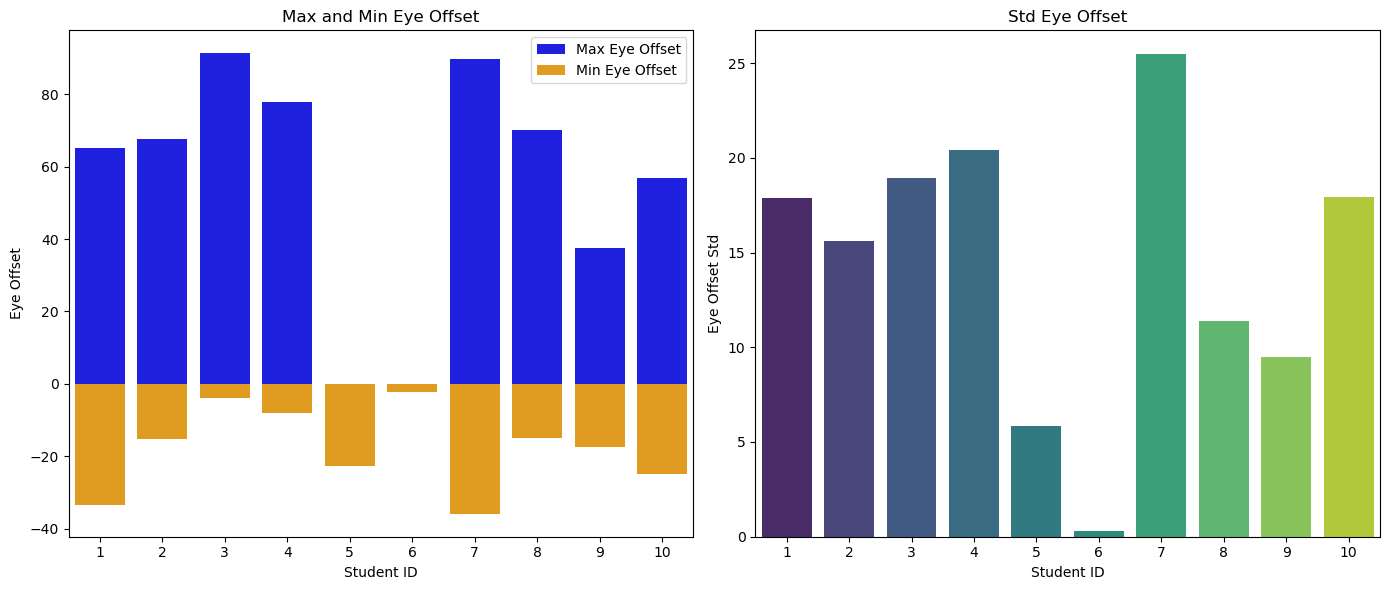

In [28]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Max and Min Eye Offset in the first subplot
sns.barplot(x=final_gaze_df.index, y=final_gaze_df['eye_offset_max'], ax=ax[0], color='blue', label='Max Eye Offset')
sns.barplot(x=final_gaze_df.index, y=final_gaze_df['eye_offset_min'], ax=ax[0], color='orange', label='Min Eye Offset')
ax[0].set_title('Max and Min Eye Offset')
ax[0].set_xlabel('Student ID')
ax[0].set_ylabel('Eye Offset')
ax[0].legend()

# Plot Std Eye Offset in the second subplot
sns.barplot(x=final_gaze_df.index, y=final_gaze_df['eye_offset_std'], ax=ax[1], palette='viridis')
ax[1].set_title('Std Eye Offset')
ax[1].set_xlabel('Student ID')
ax[1].set_ylabel('Eye Offset Std')

# Show the plot
plt.tight_layout()
plt.show()


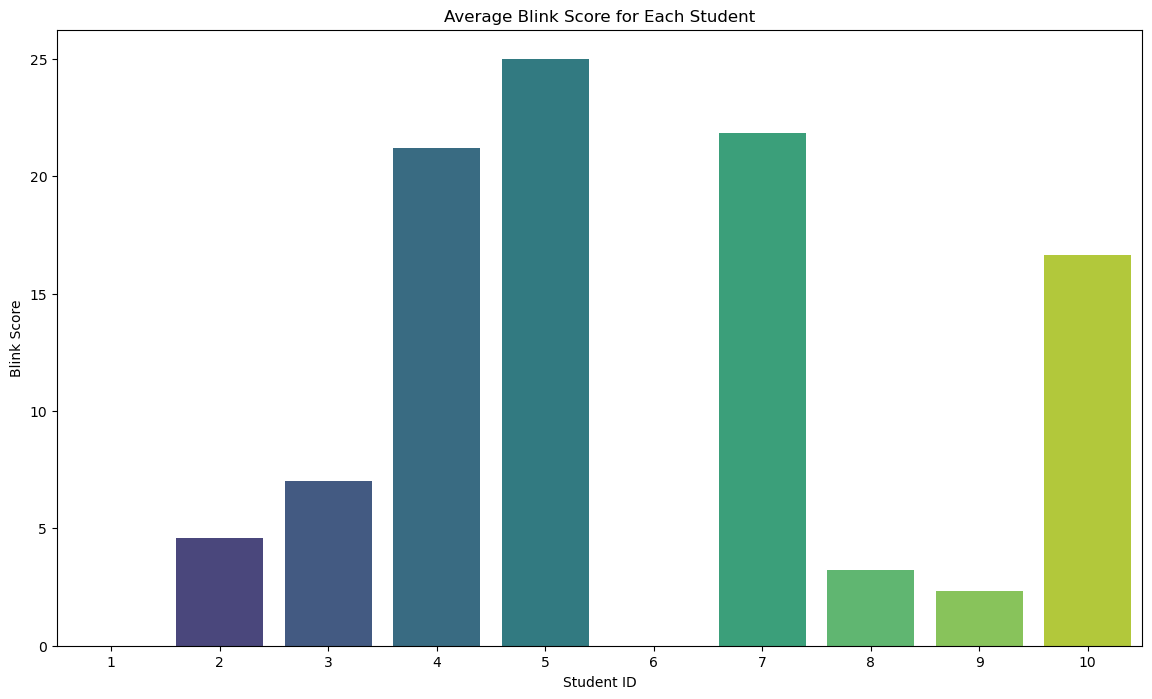

In [29]:
# plot of blink_sum with student id
plt.figure(figsize=(14, 8))
sns.barplot(x=final_gaze_df.index, y=final_gaze_df['blink_sum'], palette='viridis')
plt.title('Average Blink Score for Each Student')
plt.xlabel('Student ID')
plt.ylabel('Blink Score')
plt.show()

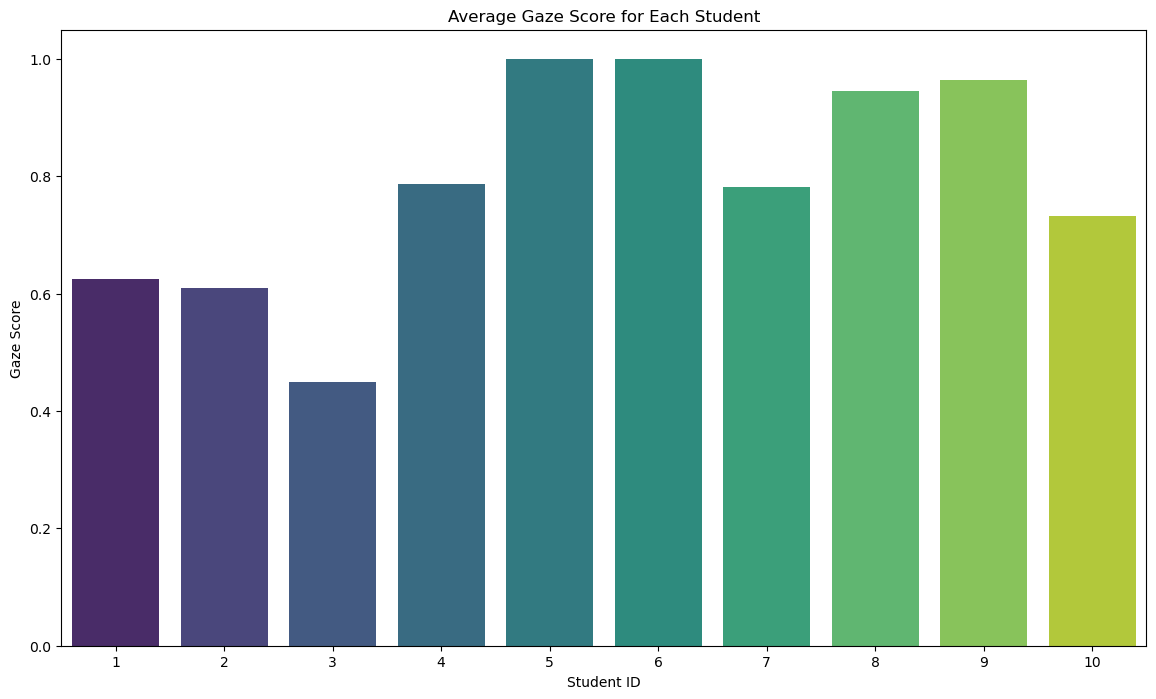

In [30]:
# advanced plot the gaze_score for each student in the final_gaze_df using sns using diff colors
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.barplot(x=final_gaze_df.index, y=final_gaze_df['gaze_score'], palette='viridis')
plt.title('Average Gaze Score for Each Student')
plt.xlabel('Student ID')
plt.ylabel('Gaze Score')
plt.show()

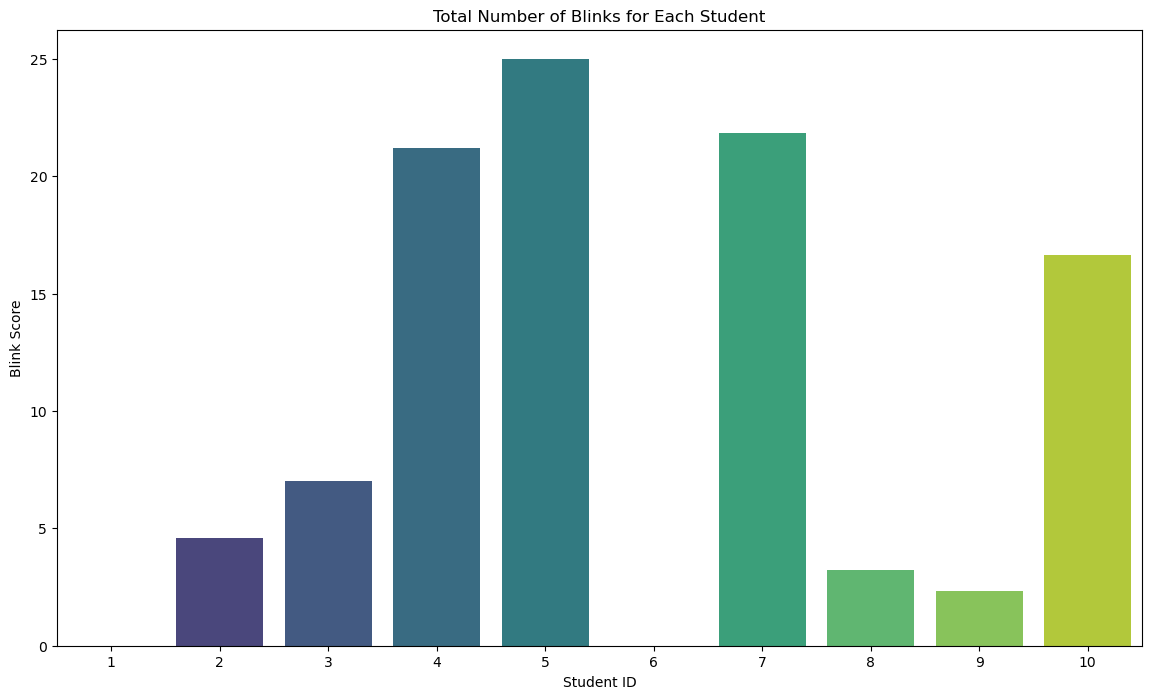

In [31]:
# \textbf{Blinking} is another important aspect of body language that can indicate a student's level of comfort and confidence during communication.\\

# If a student blinks too frequently, it may suggest nervousness or discomfort, while infrequent blinking may indicate confidence or focus.\\
# so given the final_gaze_df, we can plot the total number of blinks for each student using sns

plt.figure(figsize=(14, 8))
sns.barplot(x=final_gaze_df.index, y=final_gaze_df['blink_sum'], palette='viridis')
plt.title('Total Number of Blinks for Each Student')
plt.xlabel('Student ID')
plt.ylabel('Blink Score')
plt.show()

In [32]:
# concat final_df_with_emotions and final_gaze_df on index
final_df_with_emotions_gaze = pd.concat([final_df_with_emotions, final_gaze_df], axis=1)

In [33]:
col= final_df_with_emotions_gaze.columns

final_df_with_emotions_gaze.head(10)

avg_positive  avg_negative  avg_neutral  avg_confident  avg_hesitant  \
1       0.709199      0.141214     0.149586       0.733828      0.485172   
2       0.722006      0.107541     0.170453       0.684879      0.436158   
3       0.567257      0.264337     0.168406       0.573566      0.604004   
4       0.655748      0.169142     0.175110       0.621740      0.570452   
5       0.630573      0.187013     0.182414       0.590094      0.461488   
6       0.711182      0.138992     0.149826       0.679755      0.490252   
7       0.717354      0.140232     0.142414       0.703714      0.457070   
8       0.605402      0.192292     0.202306       0.555011      0.507622   
9       0.617353      0.223949     0.158699       0.591842      0.538732   
10      0.589267      0.220948     0.189785       0.619852      0.520637   

    avg_concise  avg_enthusiastic  avg_speech_speed dominant_emotion_top1  \
1      0.429418          0.466497          3.113771               neutral   
2      0.484221          0.516685          3.269092                 happy   
3      0.394715          0.448050          3.385636               neutral   
4      0.403479          0.440626          2.775454               neutral   
5      0.413644          0.378110          2.817341               neutral   
6      0.367792          0.481433          2.583163               neutral   
7      0.398571          0.463940          2.284897                  fear   
8      0.352011          0.437399          2.902953               neutral   
9      0.381809          0.505152          3.329938               neutral   
10     0.385655          0.325507          3.248518                   sad   

   dominant_emotion_top2                             movie_id_  gaze_score  \
1                   fear  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a    0.625000   
2                neutral  baa26895-85b2-465b-a972-649b41d9870e    0.609195   
3                   fear  d0b9170b-98b9-48e1-a1b2-1d661bb0d853    0.450000   
4                   fear  6b0386fc-41de-4196-b0d6-3d0b815c2dbc    0.787879   
5                neutral  9c350343-e895-49df-af90-d50b91d19d3e    1.000000   
6                neutral  92016995-e455-4651-9f6e-fbca0d423f21    1.000000   
7                    sad  6539370c-256e-4ed2-9d00-1be1f051163f    0.781609   
8                   fear  813af424-a584-4417-b7ee-0d4c705e83c9    0.946237   
9                  happy  dfb0d746-609f-4dac-8e1d-c0325fb64394    0.965116   
10                  fear  83c20b83-7881-499d-a40d-cc06b65869f8    0.733333   

    blink_sum  eye_offset_mean  eye_offset_max  eye_offset_min  \
1    0.000000        15.801362         65.0276        -33.4655   
2    4.597701        21.768546         67.6710        -15.2405   
3    7.000000        30.137213         91.2347         -4.0080   
4   21.212121        12.492482         77.7629         -7.9509   
5   25.000000       -15.802625         -8.4059        -22.6020   
6    0.000000        -1.707193         -1.1633         -2.1463   
7   21.839080         9.456552         89.7745        -35.8043   
8    3.225806         6.564640         69.9832        -15.0501   
9    2.325581         8.586290         37.4006        -17.5304   
10  16.666667        11.498590         56.9147        -24.9696   

    eye_offset_std  image_seq_count  
1        17.858517               88  
2        15.619435               87  
3        18.909401              100  
4        20.419822               99  
5         5.849439                4  
6         0.322101               14  
7        25.453533               87  
8        11.373373               93  
9         9.477504               86  
10       17.923358               90

In [34]:
# change th final_df_with_emotions_gaze to a csv file
final_df_with_emotions_gaze.to_csv('final_df1.csv', index=True)

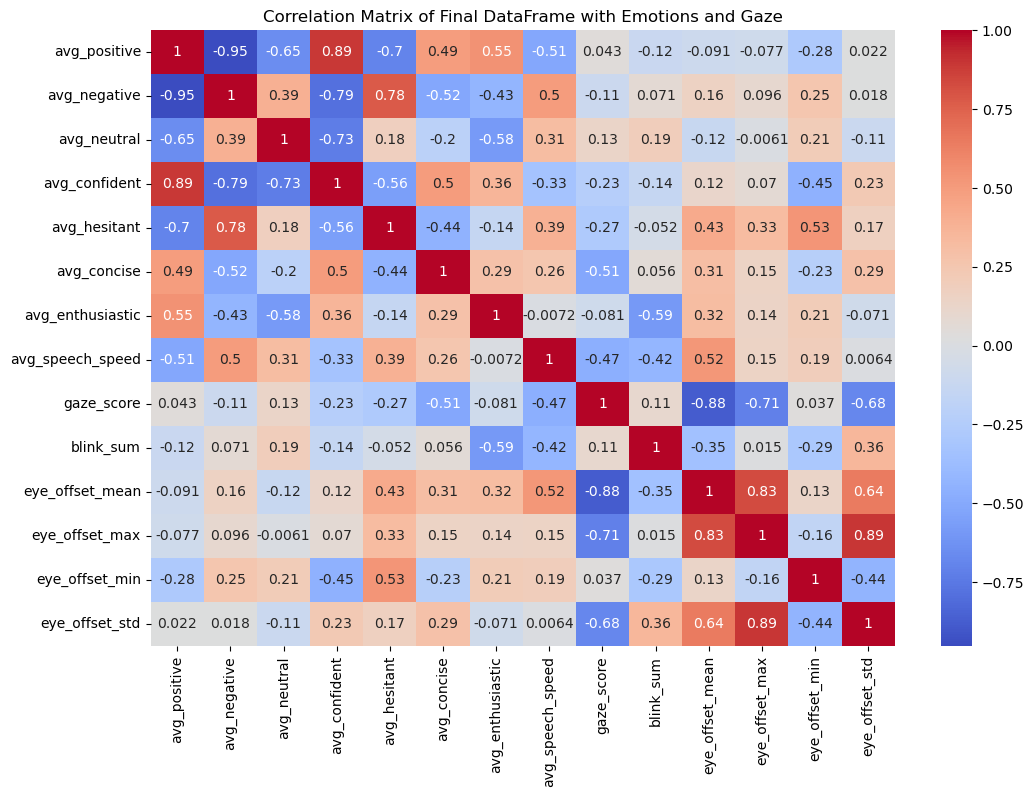

In [35]:
# plot of  correlation matrix of final_df_with_emotions_gaze without col 'image_seq_count','movie_id','dominant_emotions_top1','dominant_emotions_top2'
correlation_matrix = final_df_with_emotions_gaze.drop(columns=['image_seq_count', 'movie_id_', 'dominant_emotion_top1', 'dominant_emotion_top2']).corr()
# correlation_matrix = final_df_with_emotions_gaze[].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Final DataFrame with Emotions and Gaze')
plt.show()

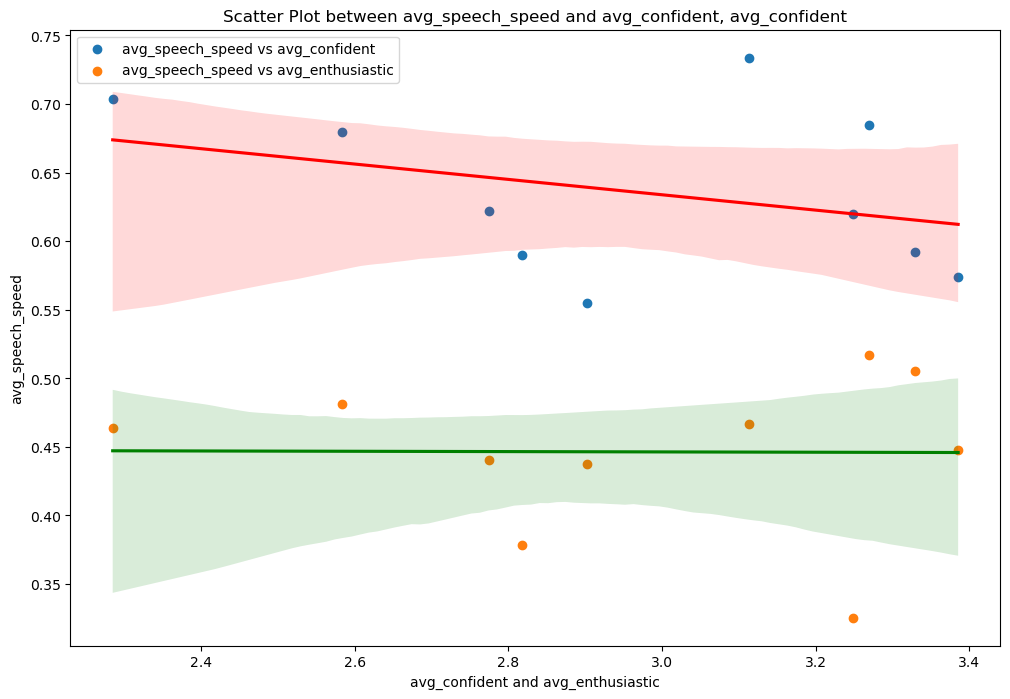

In [36]:
plt.figure(figsize=(12, 8))
plt.scatter(final_df_with_emotions_gaze['avg_speech_speed'], final_df_with_emotions_gaze['avg_confident'], label='avg_speech_speed vs avg_confident')
sns.regplot(x='avg_speech_speed', y='avg_confident', data=final_df_with_emotions_gaze, scatter=False, color='red')
plt.scatter(final_df_with_emotions_gaze['avg_speech_speed'], final_df_with_emotions_gaze['avg_enthusiastic'], label='avg_speech_speed vs avg_enthusiastic')
sns.regplot(x='avg_speech_speed', y='avg_enthusiastic', data=final_df_with_emotions_gaze, scatter=False, color='green')
plt.xlabel('avg_confident and avg_enthusiastic')
plt.ylabel('avg_speech_speed')
plt.legend()
plt.title('Scatter Plot between avg_speech_speed and avg_confident, avg_confident')
plt.show()

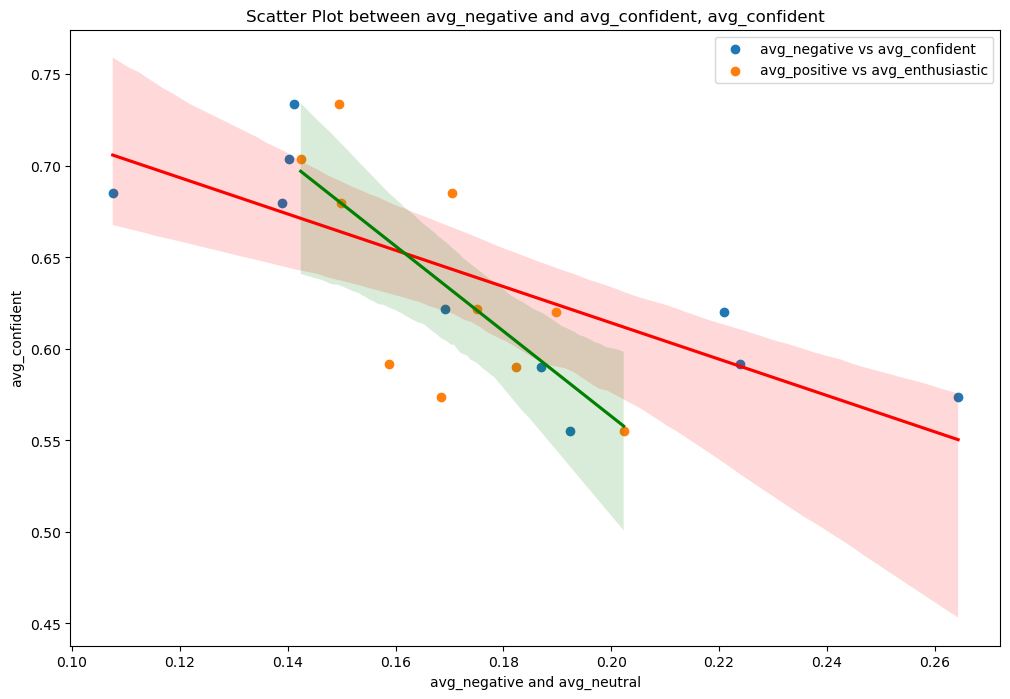

In [37]:
# pot between avg_confident and avg_negative, avg_neutral
plt.figure(figsize=(12, 8))
plt.scatter(final_df_with_emotions_gaze['avg_negative'], final_df_with_emotions_gaze['avg_confident'], label='avg_negative vs avg_confident')
sns.regplot(x='avg_negative', y='avg_confident', data=final_df_with_emotions_gaze, scatter=False, color='red')
plt.scatter(final_df_with_emotions_gaze['avg_neutral'], final_df_with_emotions_gaze['avg_confident'], label='avg_positive vs avg_enthusiastic')
sns.regplot(x='avg_neutral', y='avg_confident', data=final_df_with_emotions_gaze, scatter=False, color='green')
plt.xlabel('avg_negative and avg_neutral')
plt.ylabel('avg_confident')
plt.legend()
plt.title('Scatter Plot between avg_negative and avg_confident, avg_confident')
plt.show()

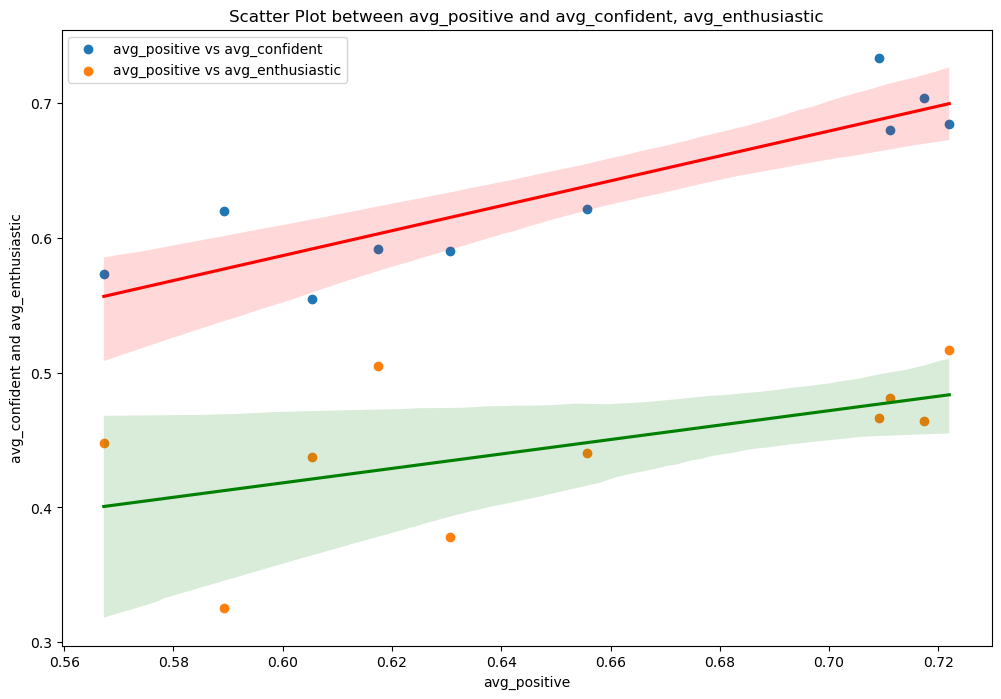

In [38]:
# plot between avg_postive and avg_confidence,avg_enthusiastic and also draw a line regresion line
plt.figure(figsize=(12, 8))
plt.scatter(final_df_with_emotions_gaze['avg_positive'], final_df_with_emotions_gaze['avg_confident'], label='avg_positive vs avg_confident')
sns.regplot(x='avg_positive', y='avg_confident', data=final_df_with_emotions_gaze, scatter=False, color='red')
plt.scatter(final_df_with_emotions_gaze['avg_positive'], final_df_with_emotions_gaze['avg_enthusiastic'], label='avg_positive vs avg_enthusiastic')
sns.regplot(x='avg_positive', y='avg_enthusiastic', data=final_df_with_emotions_gaze, scatter=False, color='green')
plt.xlabel('avg_positive')
plt.ylabel('avg_confident and avg_enthusiastic')
plt.legend()
plt.title('Scatter Plot between avg_positive and avg_confident, avg_enthusiastic')
plt.show()

<Figure size 1200x800 with 0 Axes>

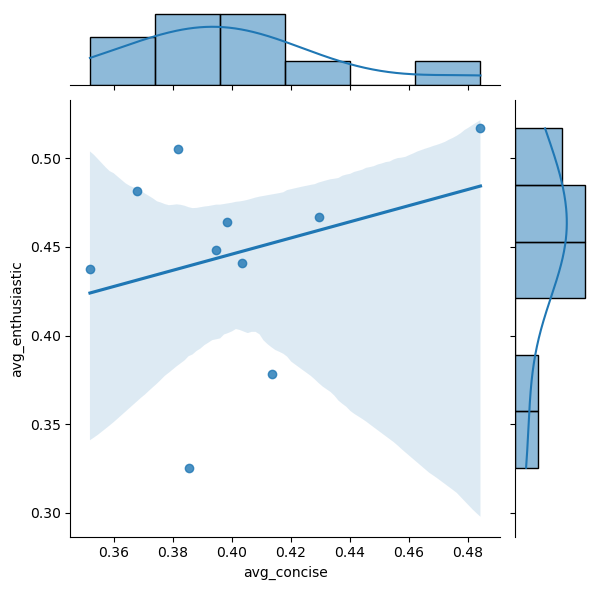

In [39]:
# #  plot the graph between avg_concise and avg_enthusiastic using sns showing how their are affecting each other
# plt.figure(figsize=(12, 8))
# sns.scatterplot(data=final_df_with_emotions_gaze, x='avg_concise', y='avg_enthusiastic')
# plt.title('Scatter Plot of Conciseness vs Enthusiasm')
# plt.show()
# other than scatter plot we can also use jointplot
plt.figure(figsize=(12, 8))
sns.jointplot(data=final_df_with_emotions_gaze, x='avg_concise', y='avg_enthusiastic', kind='reg')
plt.show()



<Figure size 1200x800 with 0 Axes>

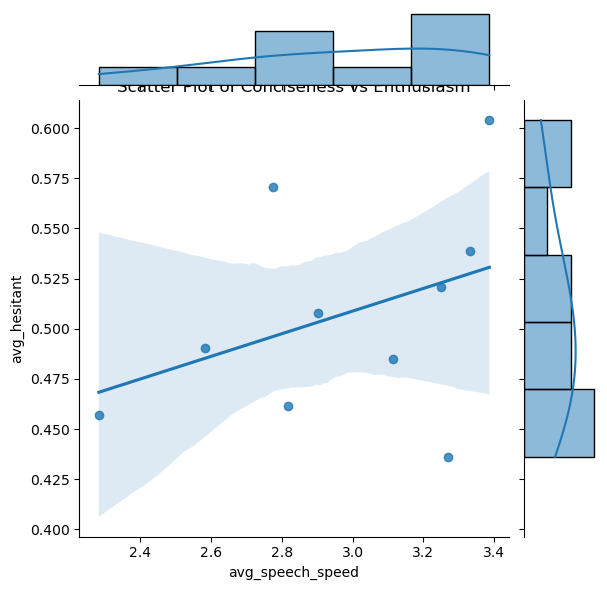

In [40]:
# plot the graph between avg_speech_speed and avg_enthusiastic using sns showing how their are affecting each other
plt.figure(figsize=(12, 8))
sns.jointplot(data=final_df_with_emotions_gaze, x='avg_speech_speed', y='avg_hesitant',kind='reg')
plt.title('Scatter Plot of Conciseness vs Enthusiasm')
plt.show()  

### Text analysis

In [70]:
# \subsection{Expertise Identification}
# % Include content about Named Entity Recognition, frequency distribution of key terms, etc.
#  i have 10 text files in the transcript_data folder, i will read each file and extract the text data from each file and then perform Named Entity Recognition (NER) to identify the key terms and entities mentioned in the text.\\
import spacy

# Load your spaCy model
nlp = spacy.load("en_core_web_sm")

all_entities = []

# Iterate through the text files, extract entities, and store them with student_id
for i in range(1, 11):
    student_id = i
    file_path = rf"transcripts-20240913T100012Z-001\transcripts\{i}.txt"
    
    with open(file_path, 'r') as file:
        text = file.read()
        doc = nlp(text)
        
        # Store the student_id along with the extracted entities
        entities = {
            'student_id': student_id,
            'entities': [(ent.text, ent.label_) for ent in doc.ents]
        }
        all_entities.append(entities)

# Print out the results, with student_id and their respective entities
for entity_data in all_entities:
    student_id = entity_data['student_id']
    entities = entity_data['entities']
    print(f"Student ID: {student_id}")
    print("Entities:")
    for ent_text, ent_label in entities:
        print(f" - {ent_text} ({ent_label})")
    print()  # Add spacing between students' data


Student ID: 1
Entities:
 - Jeffrey Shepherd (PERSON)
 - IIM Coikode (ORG)
 - B.Tech (ORG)
 - Heritage Institute of  Technology Kolkata (ORG)
 - IIT Kharagpur (ORG)
 - three years (DATE)
 - Ciro Klein Farm (ORG)
 - Mumbai (GPE)
 - three years (DATE)
 - two years (DATE)
 - IIT Kharagpur (ORG)

Student ID: 2
Entities:
 - Beside You (PERSON)
 - Cameron Barajas (PERSON)
 - today (DATE)
 - BBA (ORG)
 - 2022 (DATE)
 - summer 2022 (DATE)
 - Hyderabad (GPE)
 - Kabadi Techno (GPE)
 - two (CARDINAL)

Student ID: 3
Entities:
 - Michael Guzman (PERSON)
 - 21 years old (DATE)
 - Hailing (PERSON)
 - Varanasi (GPE)
 - MBA (ORG)
 - first (ORDINAL)
 - the school student council (ORG)
 - BHU (ORG)
 - 1.2% (PERCENT)
 - Varanasi University (ORG)
 - COVID-19 (ORG)
 - my very day days (DATE)
 - the National Service Team (ORG)
 - COVID-19 (ORG)
 - Varanasi (GPE)
 - YouTube (ORG)
 - the next year's  hours (DATE)

Student ID: 4
Entities:
 - Monique Mccormick (PERSON)
 - Guntur (GPE)
 - Andhra Pradesh (PERSON)
 

In [69]:
# now i will create a dataframe from the all_entities list and then i will plot the frequency distribution of the key terms and entities mentioned in the text.\\

df_entities = pd.DataFrame(all_entities, columns=['Entity', 'Label'])
df_entities.head(2)


Entity   Label
0  Jeffrey Shepherd  PERSON
1       IIM Coikode     ORG